<a href="https://colab.research.google.com/github/FelixMedrano/Intro-to-artificial-intelligence/blob/main/Module_06_swarm_intelligence-ants/Assignment3_ACO/a3_medranof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A3 solving TSP using ACO

This assignment was done using Rochak Gupta's code which can be found at the following:

https://github.com/rochakgupta/aco-tsp



The link to this colab notebook is:

https://colab.research.google.com/drive/1zylJgy_VRbrjAEPFTR4IAHkqsz6HSK3N?usp=sharing


Started : ACS
Ended : ACS
Sequence : <- 25 - 23 - 16 - 24 - 4 - 13 - 8 - 17 - 19 - 2 - 20 - 18 - 9 - 21 - 5 - 11 - 10 - 7 - 12 - 15 - 6 - 1 - 14 - 22 - 3 ->
Total distance travelled to complete the tour : 1592.65

-----------------------------------------------------------------------
Started : Elitist
Ended : Elitist
Sequence : <- 14 - 1 - 6 - 15 - 12 - 7 - 10 - 11 - 5 - 21 - 9 - 18 - 20 - 2 - 19 - 17 - 8 - 13 - 4 - 24 - 16 - 23 - 25 - 3 - 22 ->
Total distance travelled to complete the tour : 1592.65

-----------------------------------------------------------------------
Started : MaxMin
Ended : MaxMin
Sequence : <- 21 - 3 - 25 - 2 - 19 - 17 - 8 - 13 - 4 - 24 - 16 - 23 - 22 - 14 - 1 - 6 - 15 - 12 - 7 - 10 - 11 - 5 - 9 - 18 - 20 ->
Total distance travelled to complete the tour : 1567.09

-----------------------------------------------------------------------
Started : Ranked
Ended : Ranked
Sequence : <- 21 - 3 - 25 - 2 - 19 - 17 - 8 - 13 - 4 - 24 - 16 - 23 - 22 - 14 - 1 - 6 - 15 - 12 

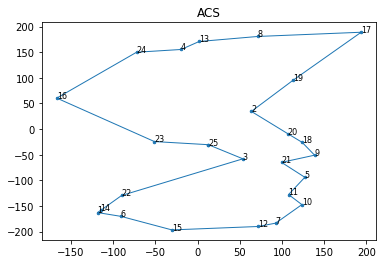

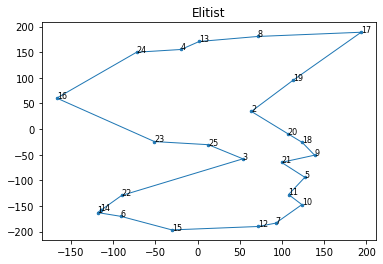

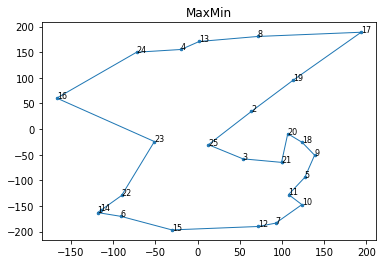

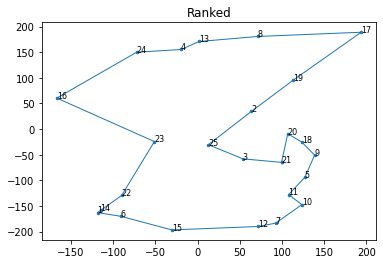

<Figure size 432x288 with 0 Axes>

In [ ]:
import math
import random
from matplotlib import pyplot as plt
random.seed(90)

class SolveTSPUsingACO:
    class Edge:
        def __init__(self, a, b, weight, initial_pheromone):
            self.a = a
            self.b = b
            self.weight = weight
            self.pheromone = initial_pheromone

    class Ant:
        def __init__(self, alpha, beta, num_nodes, edges):
            self.alpha = alpha
            self.beta = beta
            self.num_nodes = num_nodes
            self.edges = edges
            self.tour = None
            self.distance = 0.0
            

        def _select_node(self):
            roulette_wheel = 0.0
            unvisited_nodes = [node for node in range(self.num_nodes) if node not in self.tour]
            heuristic_total = 0.0
            for unvisited_node in unvisited_nodes:
                heuristic_total += self.edges[self.tour[-1]][unvisited_node].weight
            for unvisited_node in unvisited_nodes:
                roulette_wheel += pow(self.edges[self.tour[-1]][unvisited_node].pheromone, self.alpha) * \
                                  pow((heuristic_total / self.edges[self.tour[-1]][unvisited_node].weight), self.beta)
            random_value = random.uniform(0.0, roulette_wheel)
            wheel_position = 0.0
            for unvisited_node in unvisited_nodes:
                wheel_position += pow(self.edges[self.tour[-1]][unvisited_node].pheromone, self.alpha) * \
                                  pow((heuristic_total / self.edges[self.tour[-1]][unvisited_node].weight), self.beta)
                if wheel_position >= random_value:
                    return unvisited_node

        def find_tour(self):
            self.tour = [random.randint(0, self.num_nodes - 1)]
            while len(self.tour) < self.num_nodes:
                self.tour.append(self._select_node())
            return self.tour

        def get_distance(self):
            self.distance = 0.0
            for i in range(self.num_nodes):
                self.distance += self.edges[self.tour[i]][self.tour[(i + 1) % self.num_nodes]].weight
            return self.distance

    def __init__(self, mode='ACS', colony_size=10, elitist_weight=1.0, min_scaling_factor=0.001, alpha=1.0, beta=3.0,
                 rho=0.1, pheromone_deposit_weight=1.0, initial_pheromone=1.0, steps=100, nodes=None, labels=None, changed=False, rank_weight=0):
        self.mode = mode
        self.colony_size = colony_size
        self.elitist_weight = elitist_weight
        self.min_scaling_factor = min_scaling_factor
        self.rho = rho
        self.pheromone_deposit_weight = pheromone_deposit_weight
        self.steps = steps
        self.num_nodes = len(nodes)
        self.nodes = nodes
        self.rank_weight=rank_weight
        self.change= changed
        if labels is not None:
            self.labels = labels
        else:
            self.labels = range(1, self.num_nodes + 1)
        self.edges = [[None] * self.num_nodes for _ in range(self.num_nodes)]
        for i in range(self.num_nodes):
            for j in range(i + 1, self.num_nodes):
                self.edges[i][j] = self.edges[j][i] = self.Edge(i, j, math.sqrt(
                    pow(self.nodes[i][0] - self.nodes[j][0], 2.0) + pow(self.nodes[i][1] - self.nodes[j][1], 2.0)),
                                                                initial_pheromone)
        self.ants = [self.Ant(alpha, beta, self.num_nodes, self.edges) for _ in range(self.colony_size)]
        self.global_best_tour = None
        self.global_best_distance = float("inf")

    def _add_pheromone(self, tour, distance, weight=5000.0):
        pheromone_to_add = self.pheromone_deposit_weight / distance
        for i in range(self.num_nodes):
            self.edges[tour[i]][tour[(i + 1) % self.num_nodes]].pheromone += weight * pheromone_to_add

    def _acs(self):
        for step in range(self.steps):

            for ant in self.ants:
               
                self._add_pheromone(ant.find_tour(), ant.get_distance())
                if ant.distance < self.global_best_distance:
                    self.global_best_tour = ant.tour
                    self.global_best_distance = ant.distance
            for i in range(self.num_nodes):
                
                for j in range(i + 1, self.num_nodes):
                    
                    self.edges[i][j].pheromone *= (1.0 - self.rho)

    def _elitist(self):
        for step in range(self.steps):
            for ant in self.ants:
                self._add_pheromone(ant.find_tour(), ant.get_distance())
                if ant.distance < self.global_best_distance:
                    self.global_best_tour = ant.tour
                    self.global_best_distance = ant.distance
            self._add_pheromone(self.global_best_tour, self.global_best_distance, weight=self.elitist_weight)
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    self.edges[i][j].pheromone *= (1.0 - self.rho)

    def _max_min(self):
        for step in range(self.steps):
            iteration_best_tour = None
            iteration_best_distance = float("inf")
            for ant in self.ants:
                ant.find_tour()
                
                if ant.get_distance() < iteration_best_distance:
                    iteration_best_tour = ant.tour
                    iteration_best_distance = ant.distance
            
            if float(step + 1) / float(self.steps) <= 0.75:
                self._add_pheromone(iteration_best_tour, iteration_best_distance)
                max_pheromone = self.pheromone_deposit_weight / iteration_best_distance
            else:
                if iteration_best_distance < self.global_best_distance:
                    self.global_best_tour = iteration_best_tour
                    self.global_best_distance = iteration_best_distance
                self._add_pheromone(self.global_best_tour, self.global_best_distance)
                max_pheromone = self.pheromone_deposit_weight / self.global_best_distance
            min_pheromone = max_pheromone * self.min_scaling_factor
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    self.edges[i][j].pheromone *= (1.0 - self.rho)
                    if self.edges[i][j].pheromone > max_pheromone:
                        self.edges[i][j].pheromone = max_pheromone
                    elif self.edges[i][j].pheromone < min_pheromone:
                        self.edges[i][j].pheromone = min_pheromone
    def _rank(self):
      for step in range(self.steps):
        
        for ant in self.ants:
          ant.find_tour()
          if ant.get_distance() < self.global_best_distance:
            self.global_best_tour = ant.tour
            self.global_best_distance = ant.distance
            self.change=True
        if self.change==True:
          self.change=False
          self._add_pheromone(self.global_best_tour, self.global_best_distance,weight=self.rank_weight)
          self.rank_weight+=1155
        for i in range(self.num_nodes):
          for j in range(i + 1, self.num_nodes):
            self.edges[i][j].pheromone *= (1.0 - self.rho)


    def run(self):
        print('Started : {0}'.format(self.mode))
        if self.mode == 'ACS':
            self._acs()
        elif self.mode == 'Elitist':
            self._elitist()
        elif self.mode =='Ranked':
            self._rank()
        else:
            self._max_min()
        print('Ended : {0}'.format(self.mode))
        print('Sequence : <- {0} ->'.format(' - '.join(str(self.labels[i]) for i in self.global_best_tour)))
        print('Total distance travelled to complete the tour : {0}\n'.format(round(self.global_best_distance, 2)))

    def plot(self, line_width=1, point_radius=math.sqrt(2.0), annotation_size=8, dpi=120, save=True, name=None):
        x = [self.nodes[i][0] for i in self.global_best_tour]
        x.append(x[0])
        y = [self.nodes[i][1] for i in self.global_best_tour]
        y.append(y[0])
        plt.plot(x, y, linewidth=line_width)
        plt.scatter(x, y, s=math.pi * (point_radius ** 2.0))
        plt.title(self.mode)
        for i in self.global_best_tour:
            plt.annotate(self.labels[i], self.nodes[i], size=annotation_size)
        if save:
            if name is None:
                name = '{0}.png'.format(self.mode)
            plt.savefig(name, dpi=dpi)
        plt.show()
        plt.gcf().clear()


if __name__ == '__main__':
    _colony_size = 150
    _steps = 50
    _nodes = [(random.uniform(-200, 200), random.uniform(-200, 200)) for _ in range(0, 25)]
    acs = SolveTSPUsingACO(mode='ACS', colony_size=_colony_size, steps=_steps, nodes=_nodes)
    acs.run()
    print('-----------------------------------------------------------------------')
    elitist = SolveTSPUsingACO(mode='Elitist', colony_size=_colony_size, steps=_steps, nodes=_nodes)
    elitist.run()
    print('-----------------------------------------------------------------------')
    max_min = SolveTSPUsingACO(mode='MaxMin', colony_size=_colony_size, steps=_steps, nodes=_nodes)
    max_min.run()
    print('-----------------------------------------------------------------------')
    ranked=SolveTSPUsingACO(mode='Ranked', colony_size=_colony_size, steps=_steps, nodes=_nodes)
    ranked.run()
    print('-----------------------------------------------------------------------')

    acs.plot()
    elitist.plot()
    max_min.plot()
    ranked.plot()

# Report

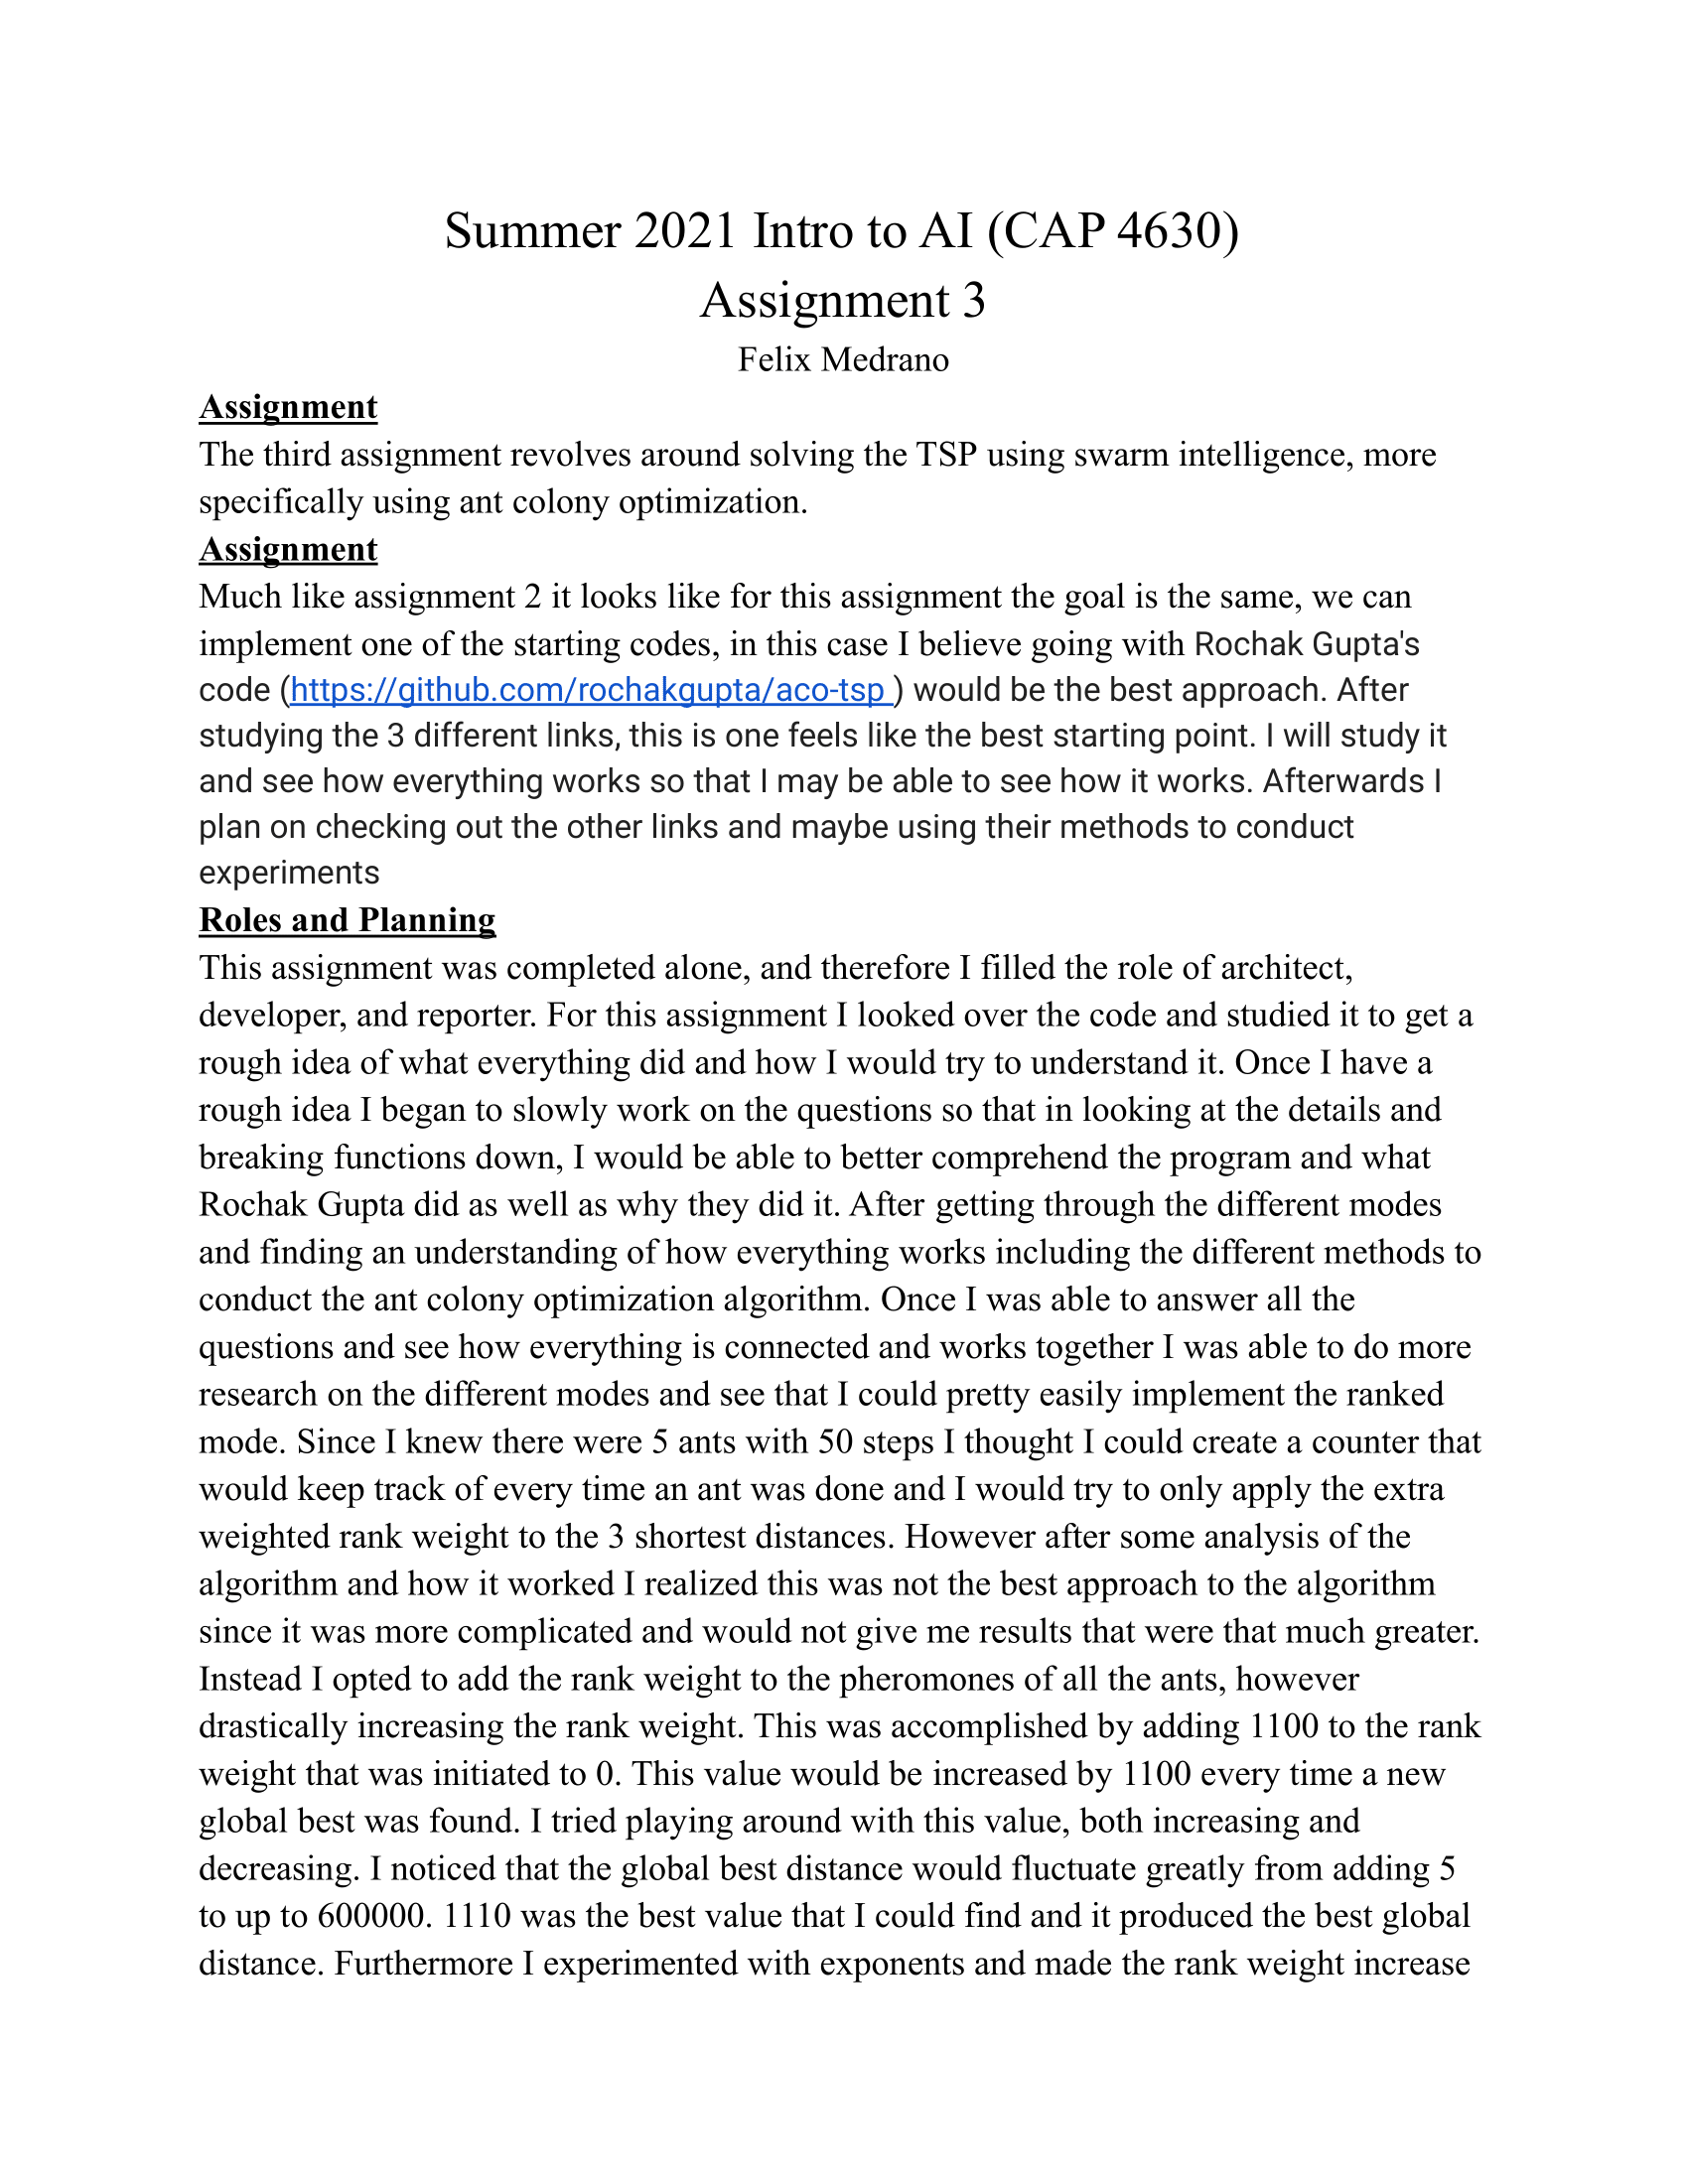

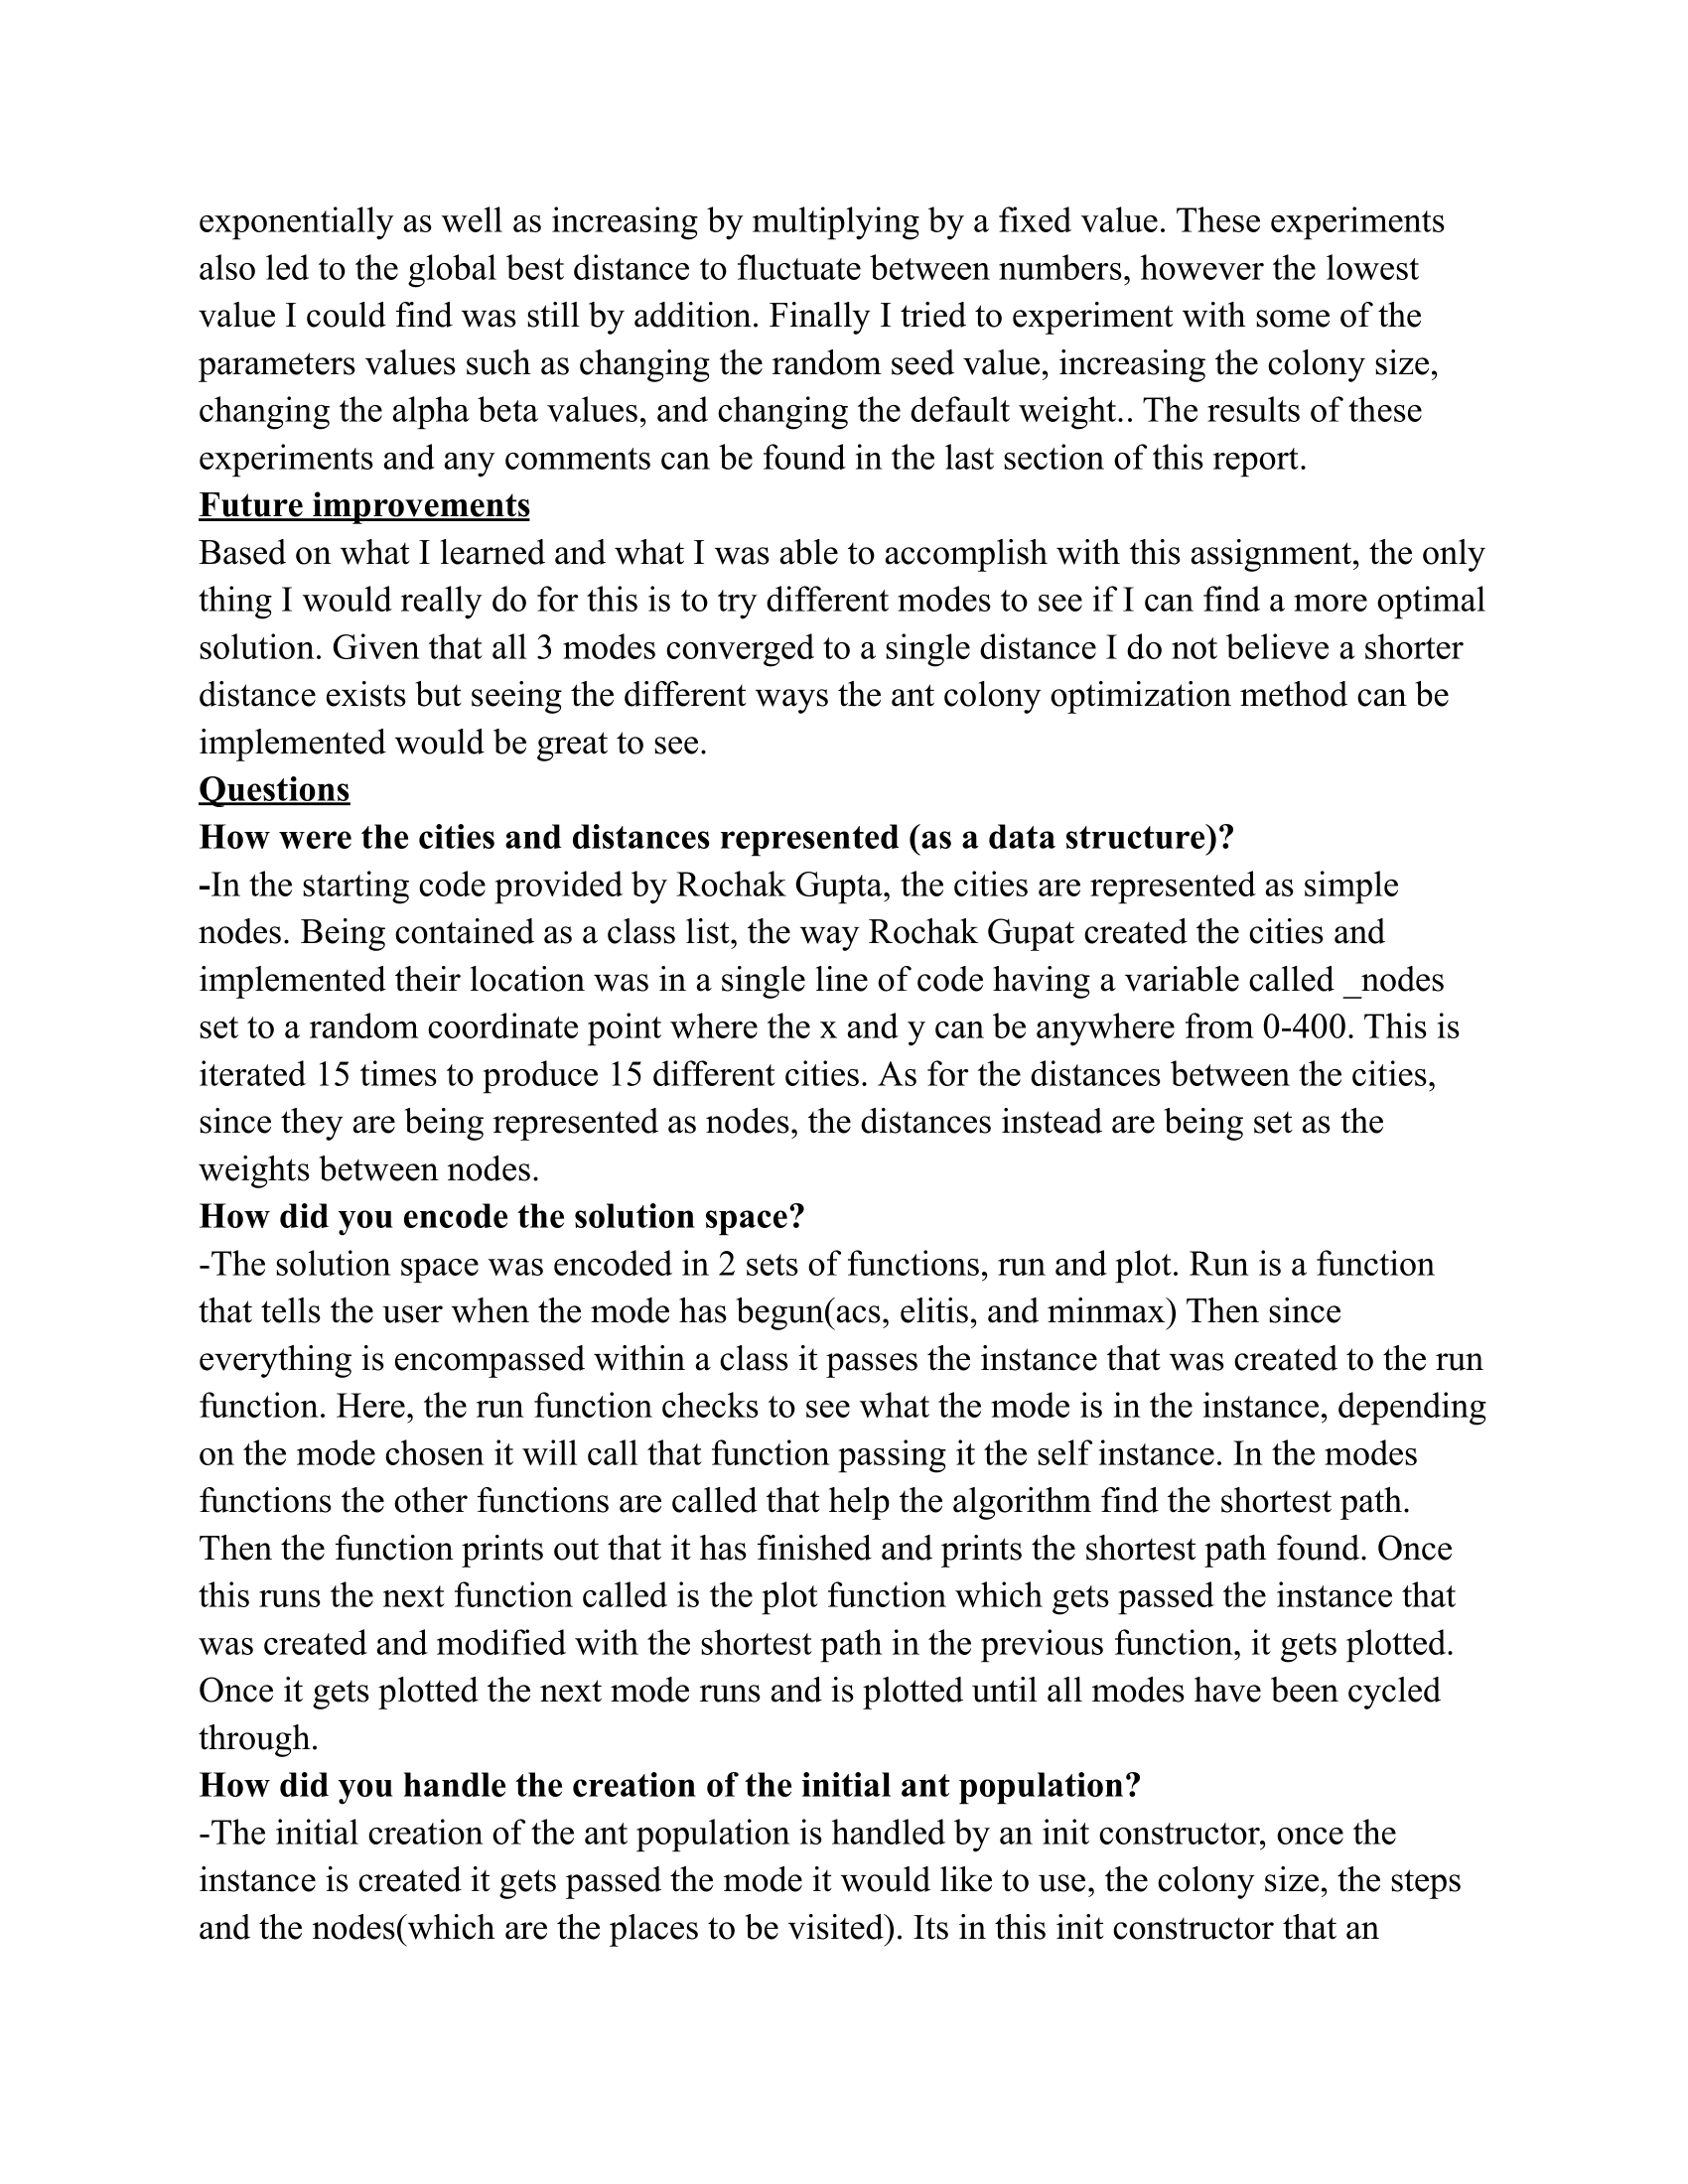

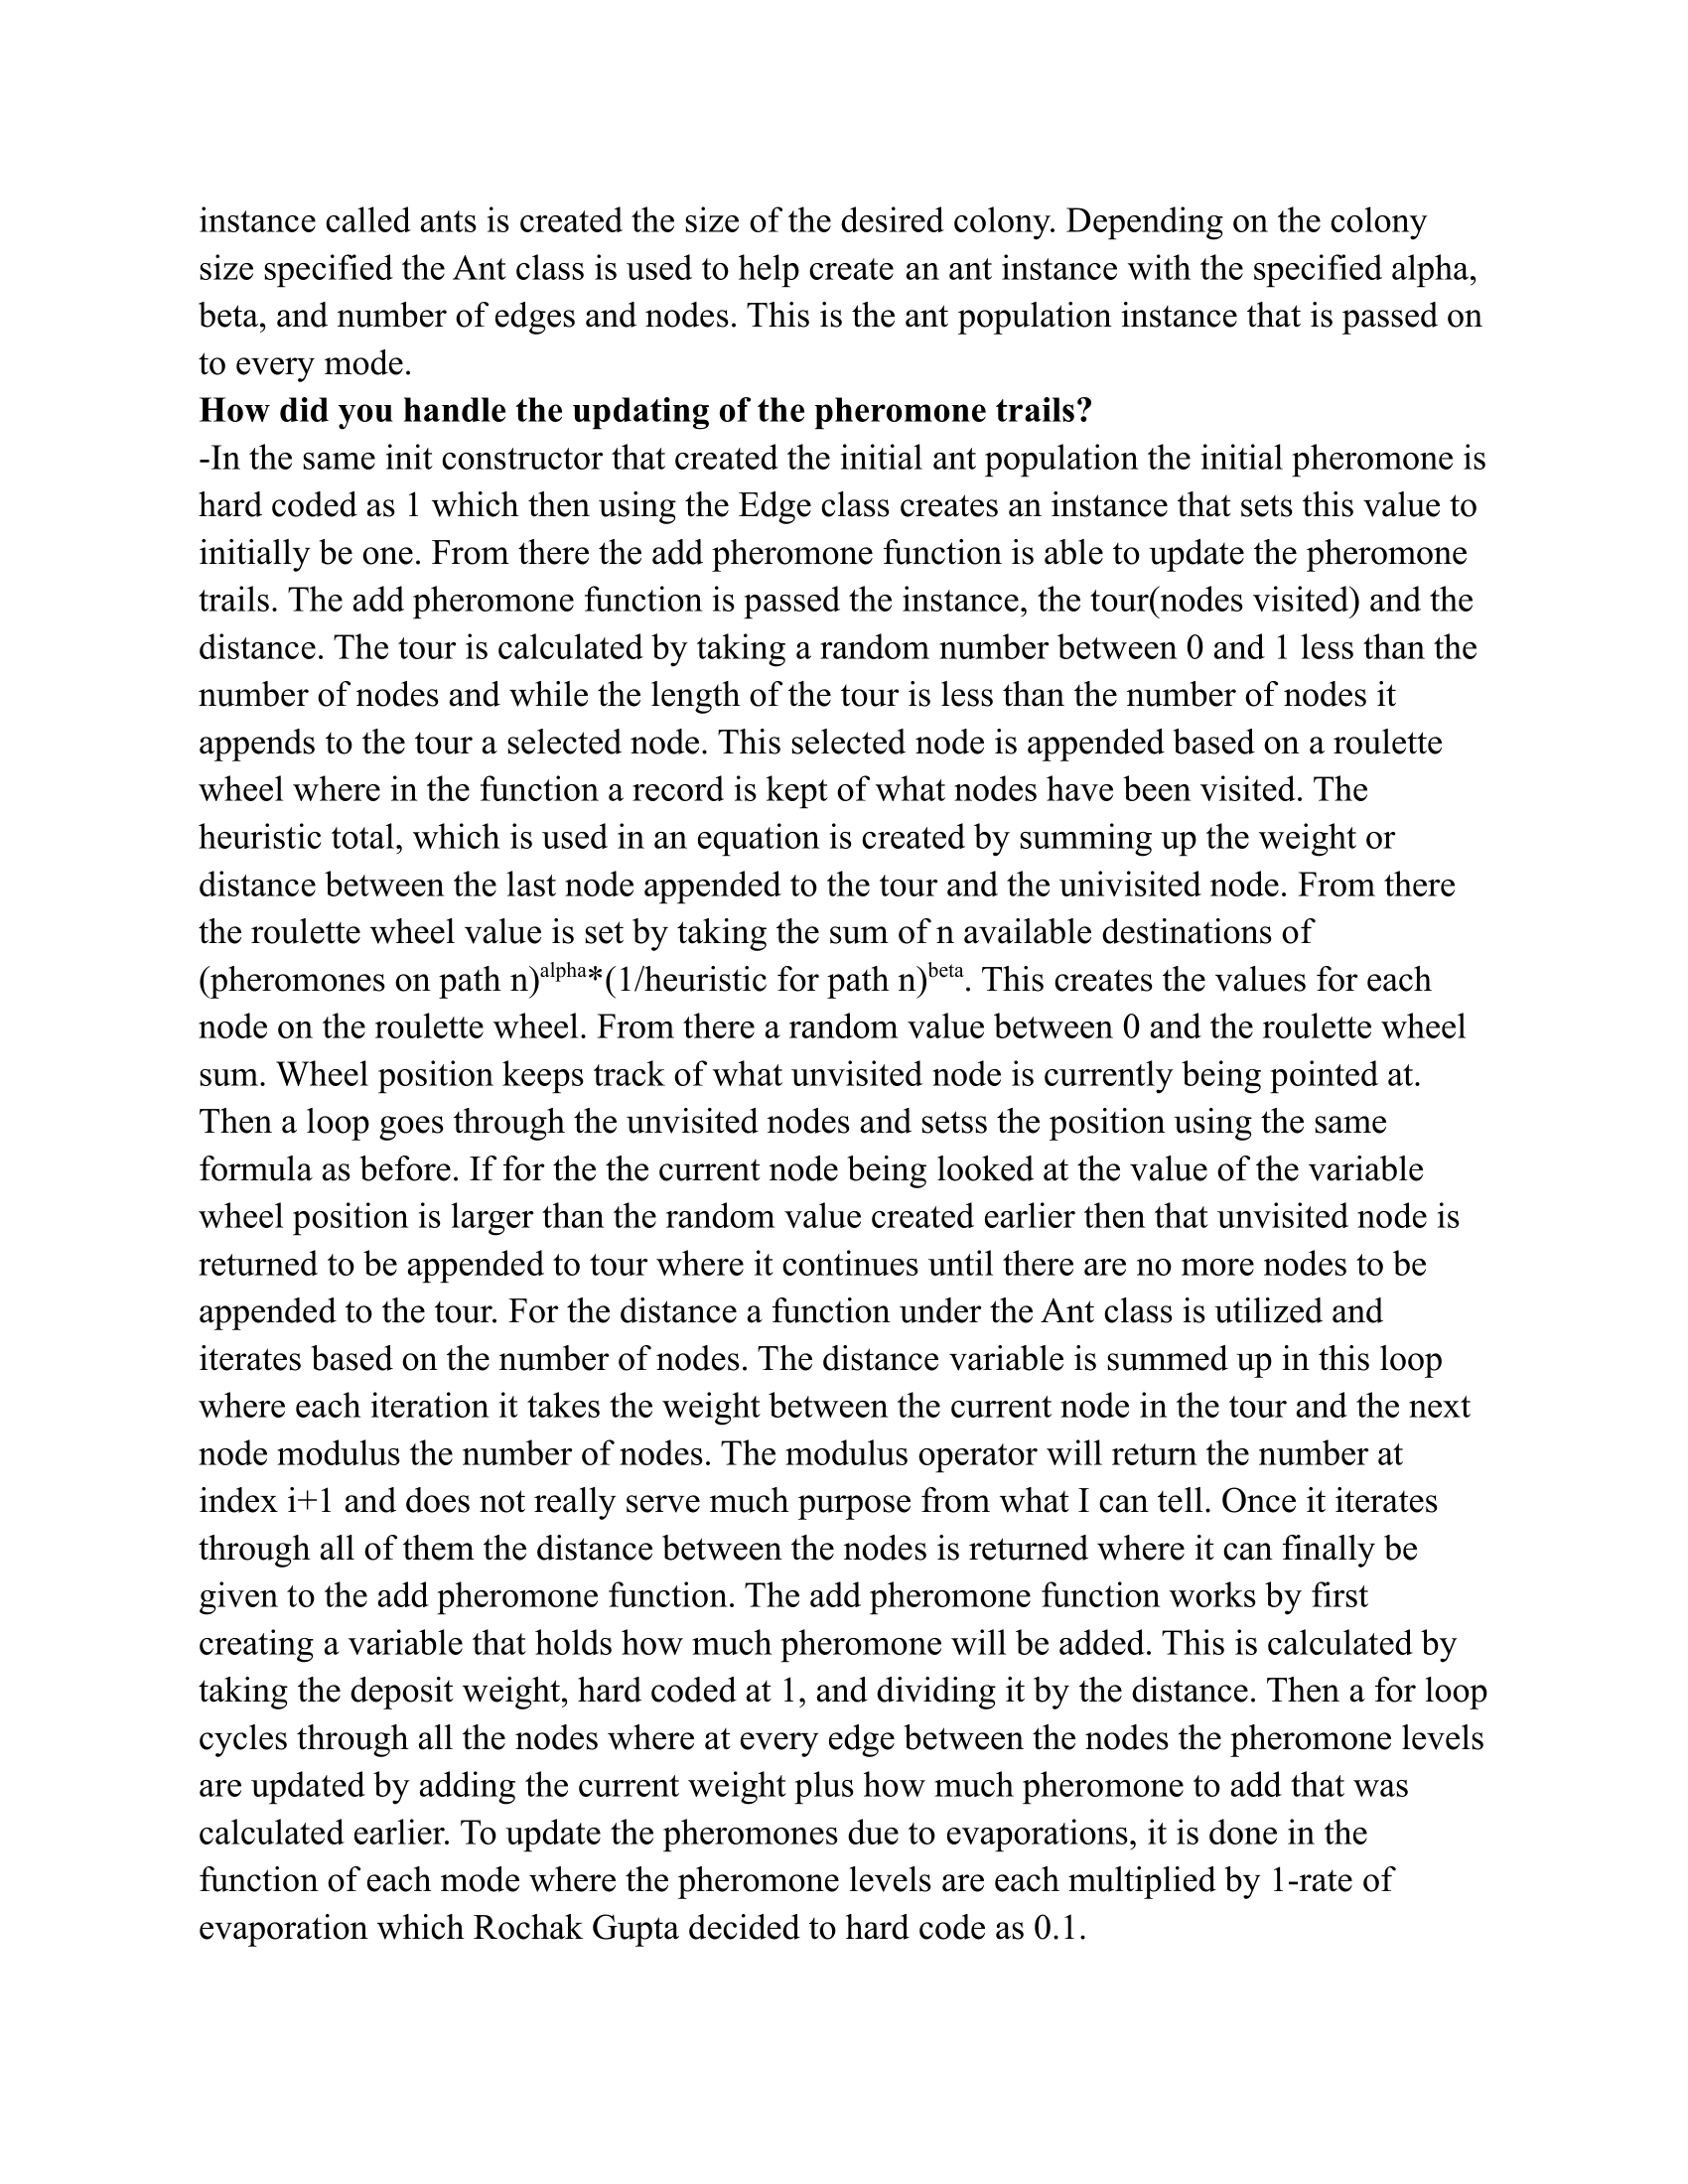

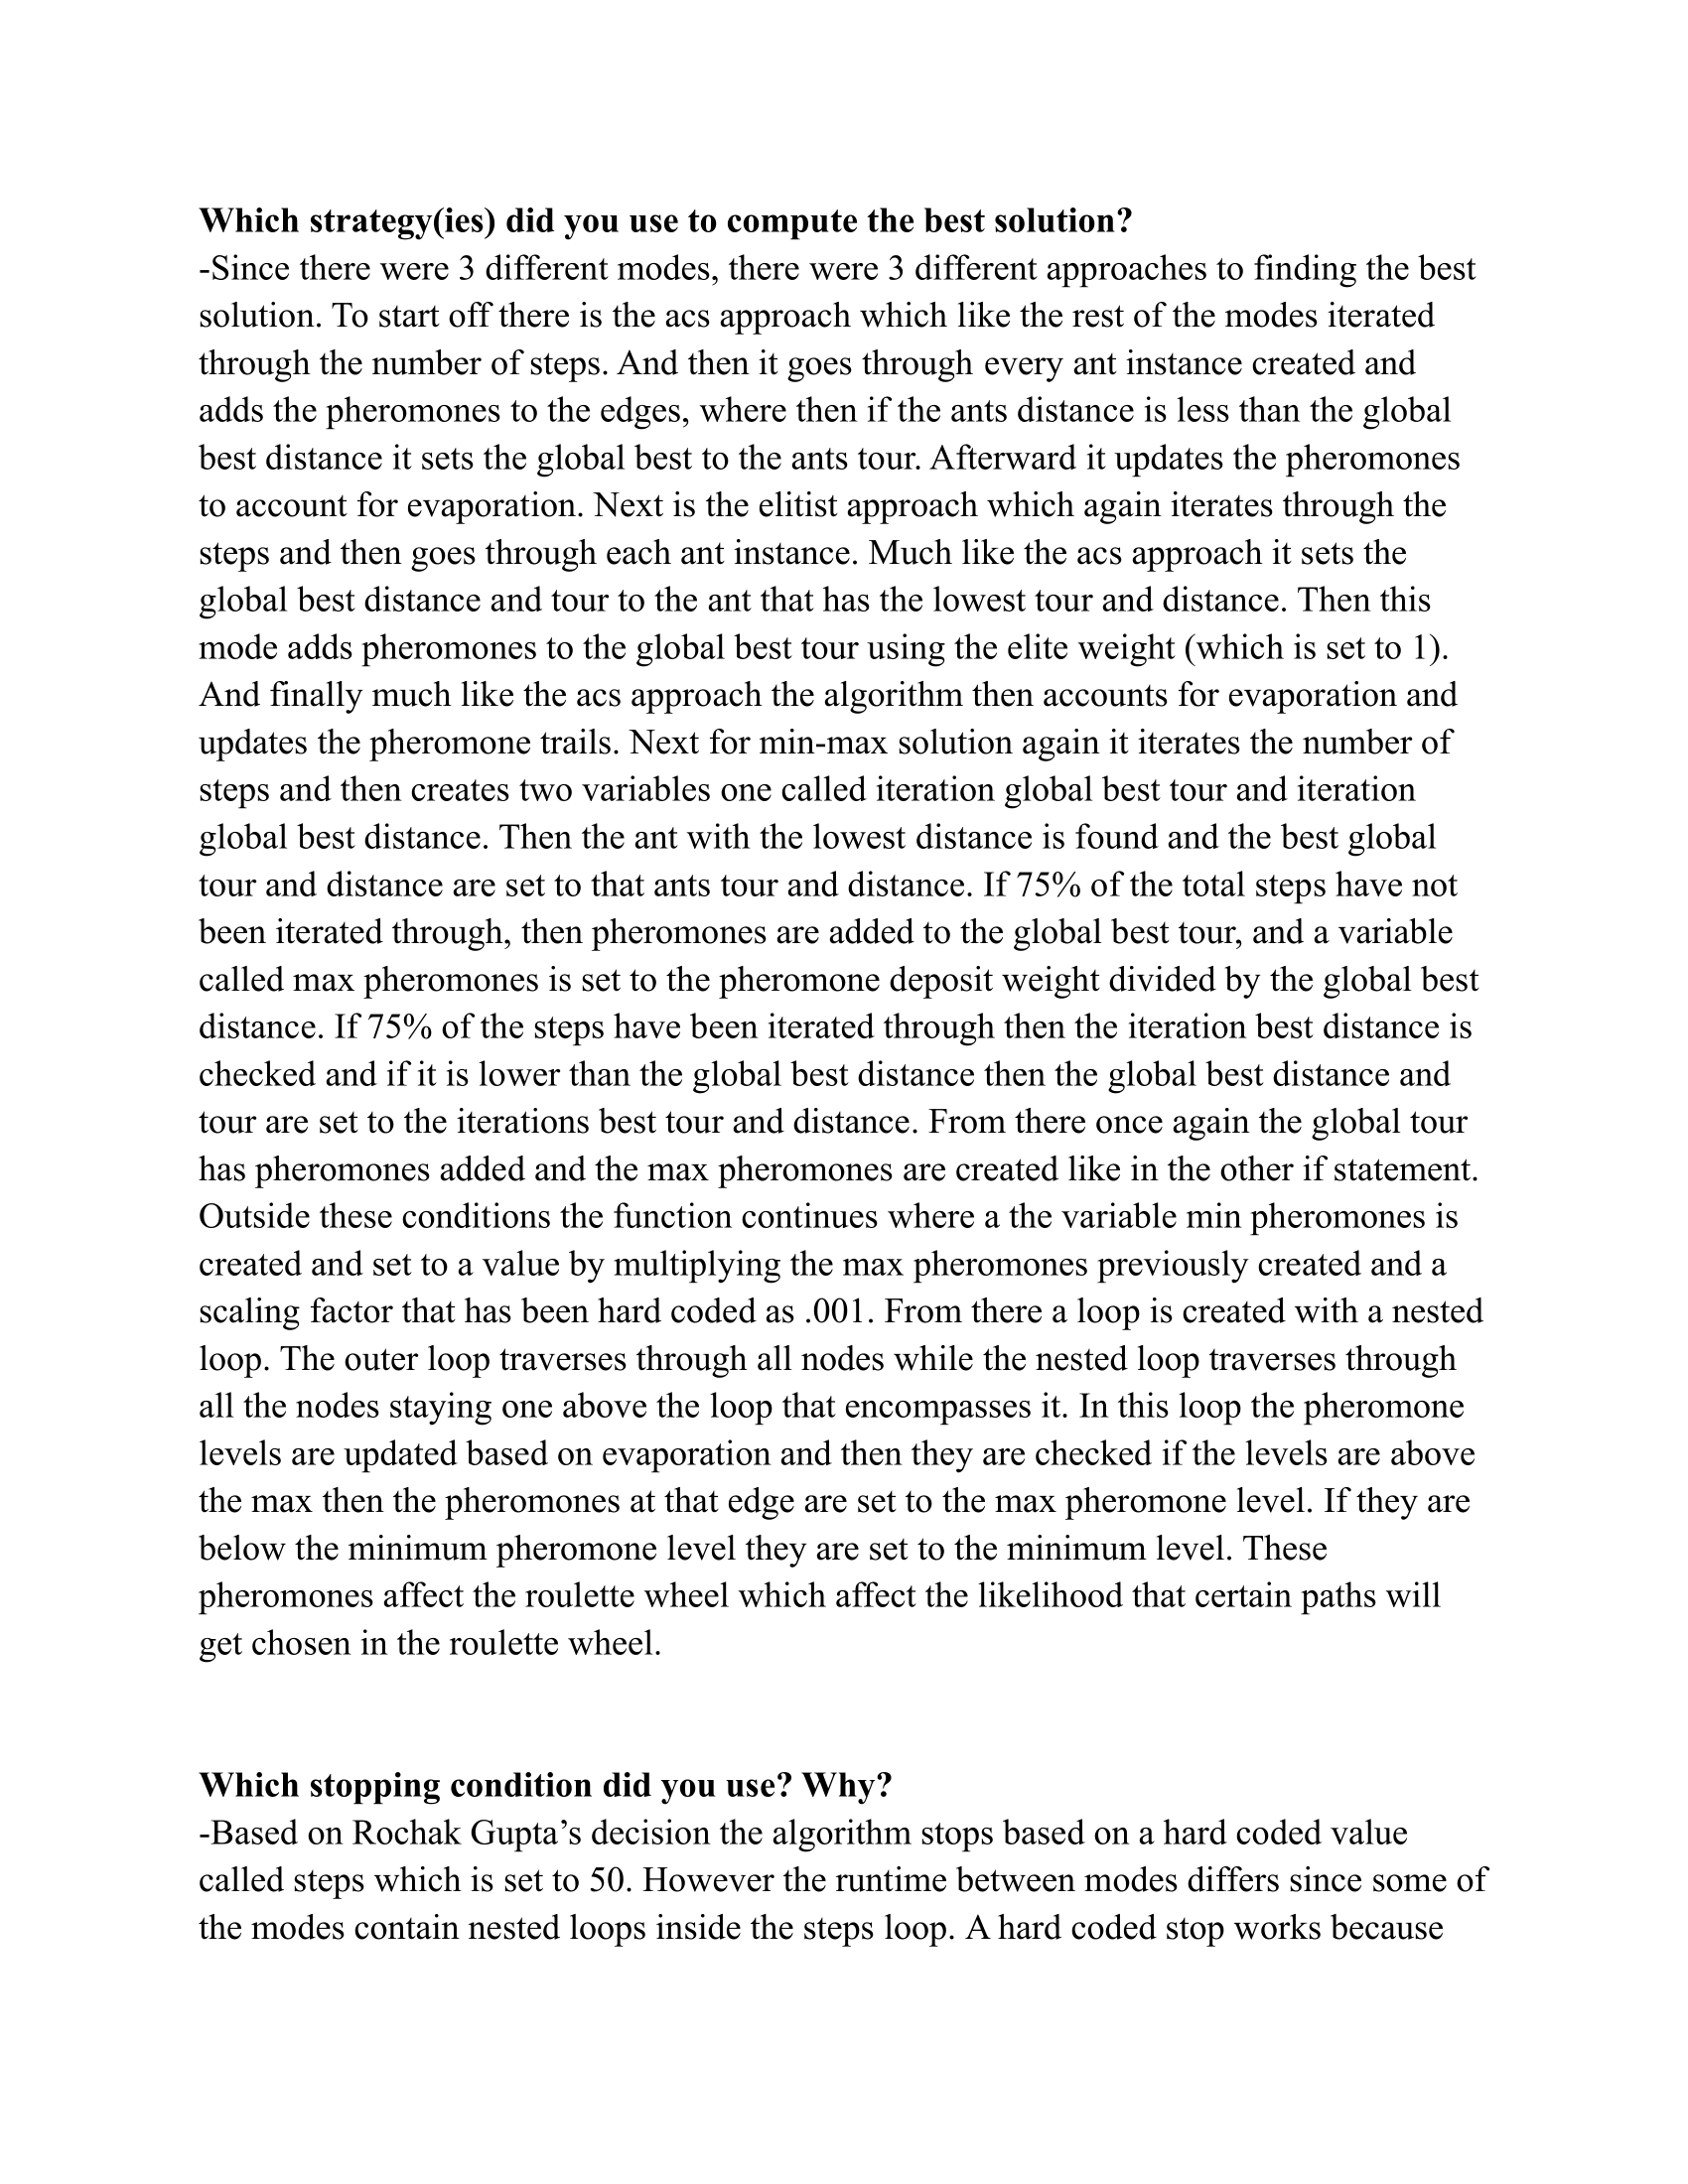

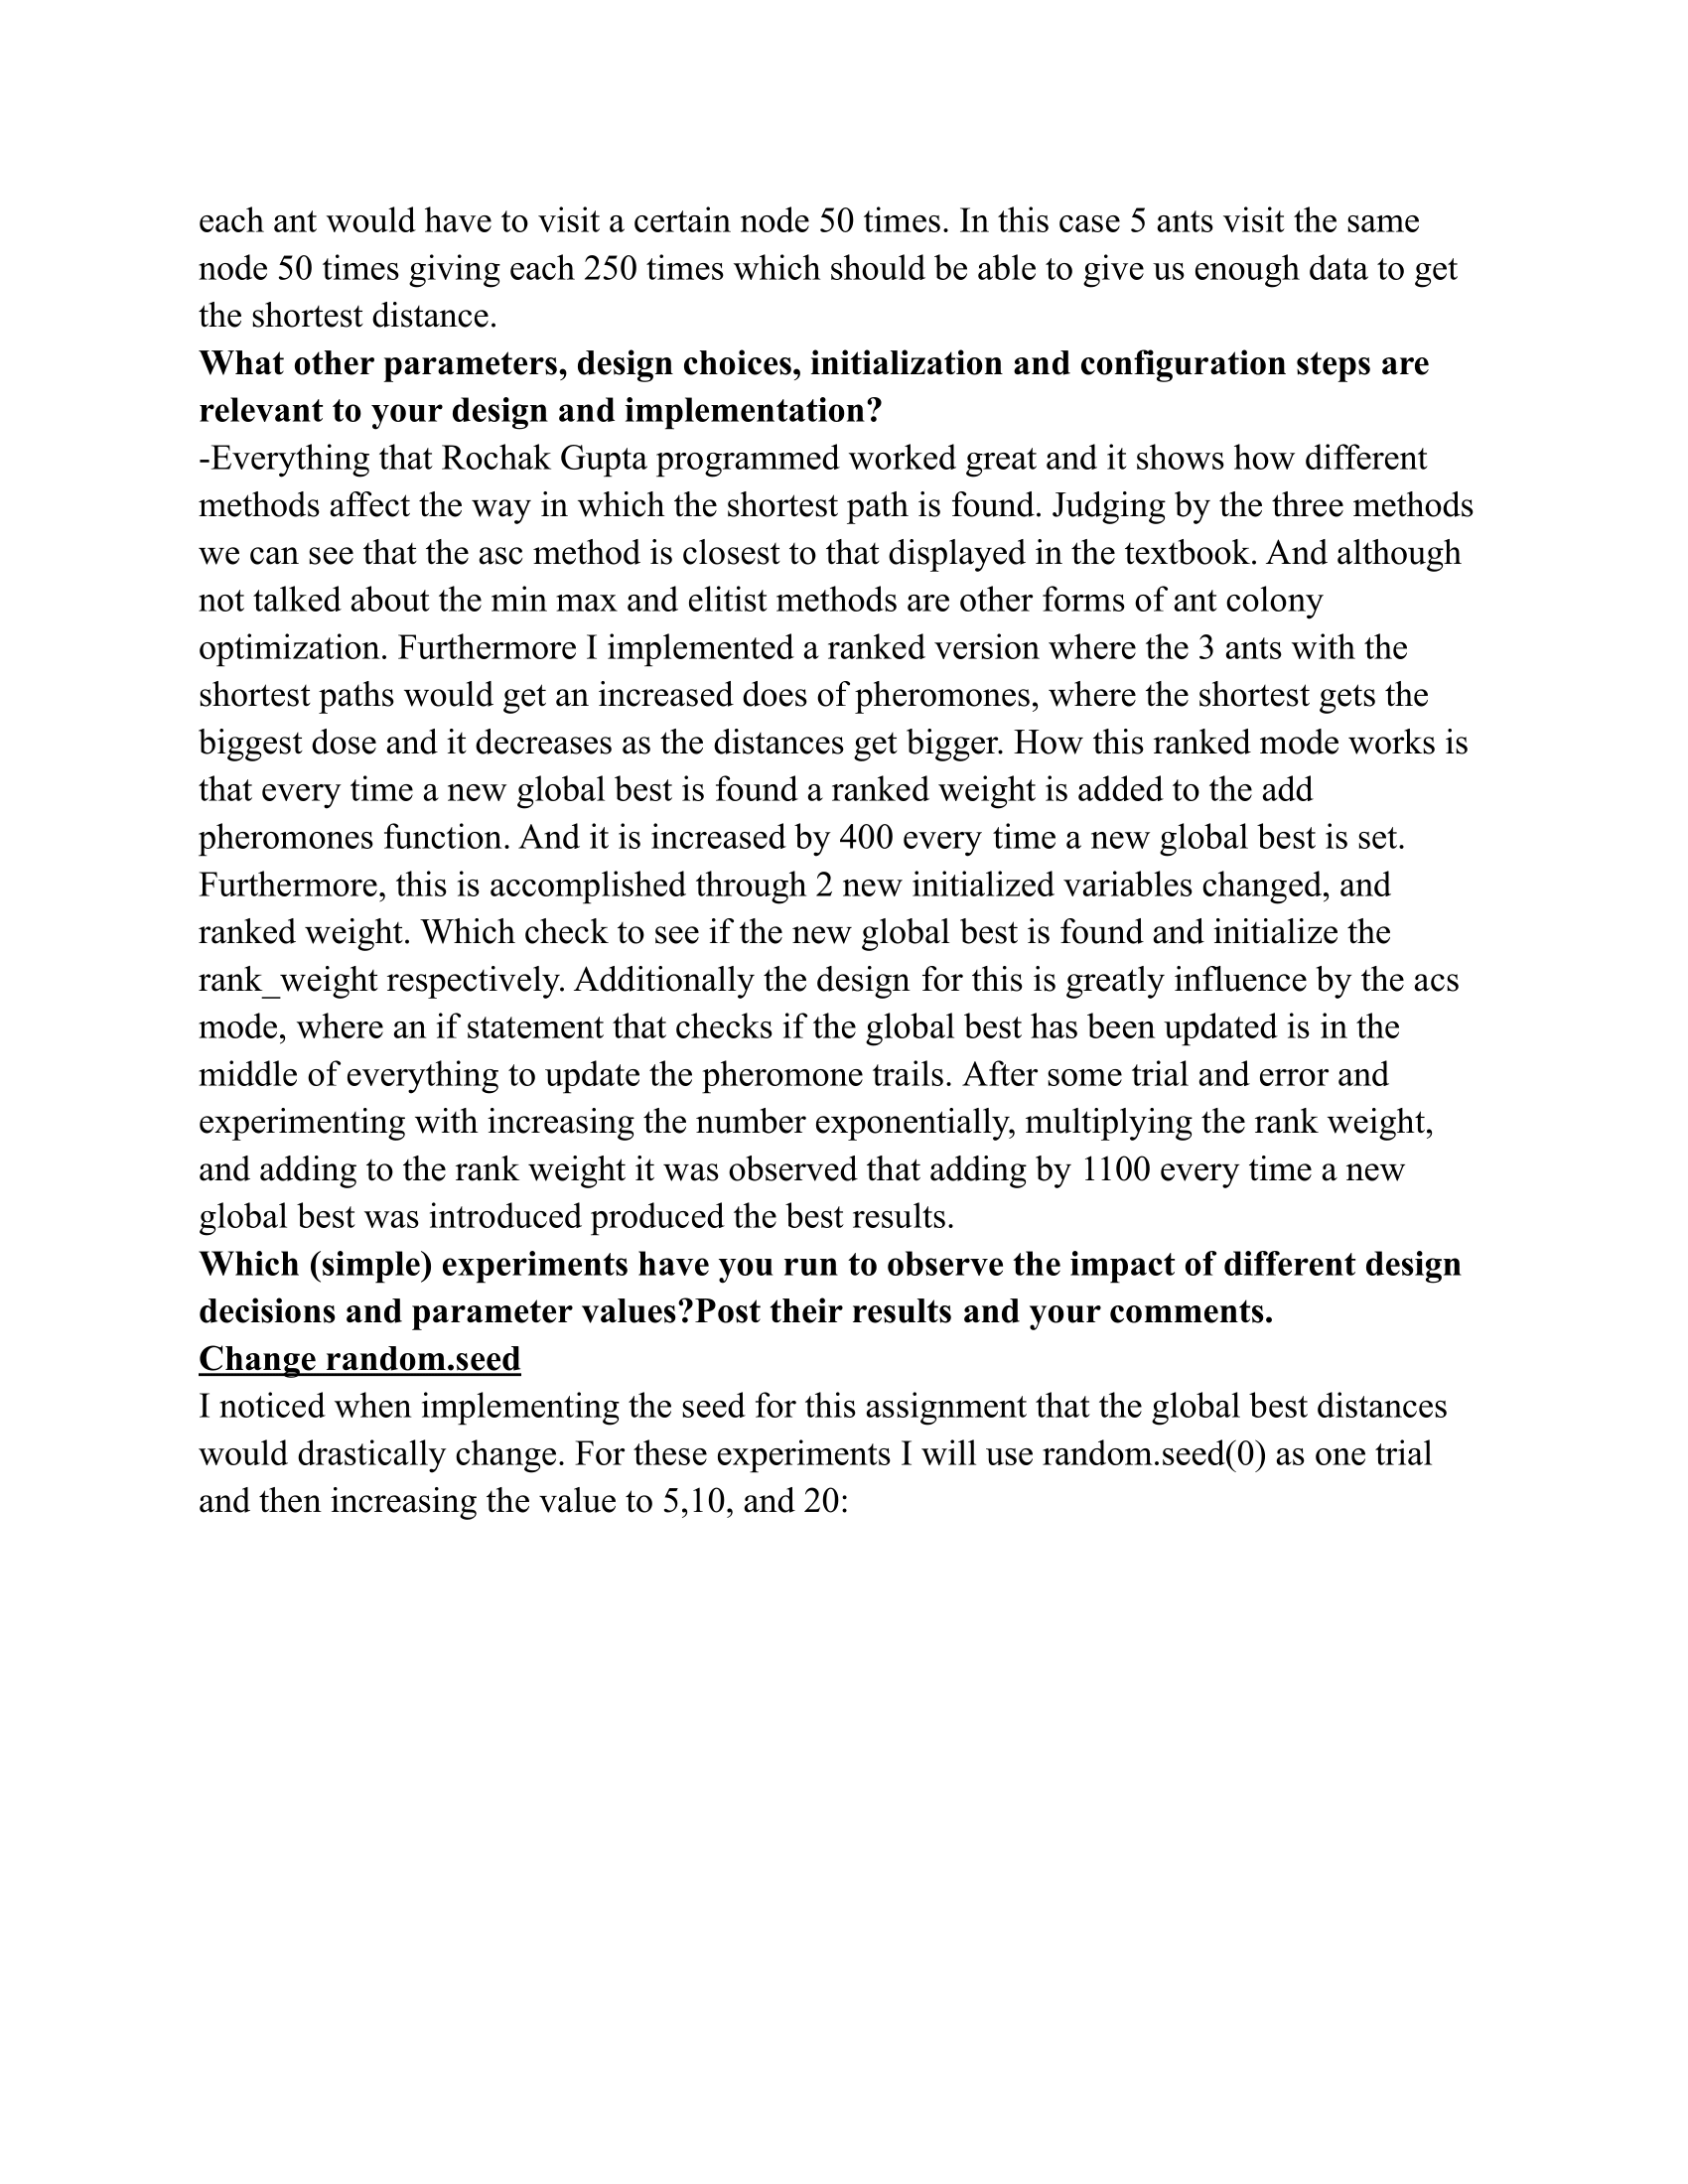

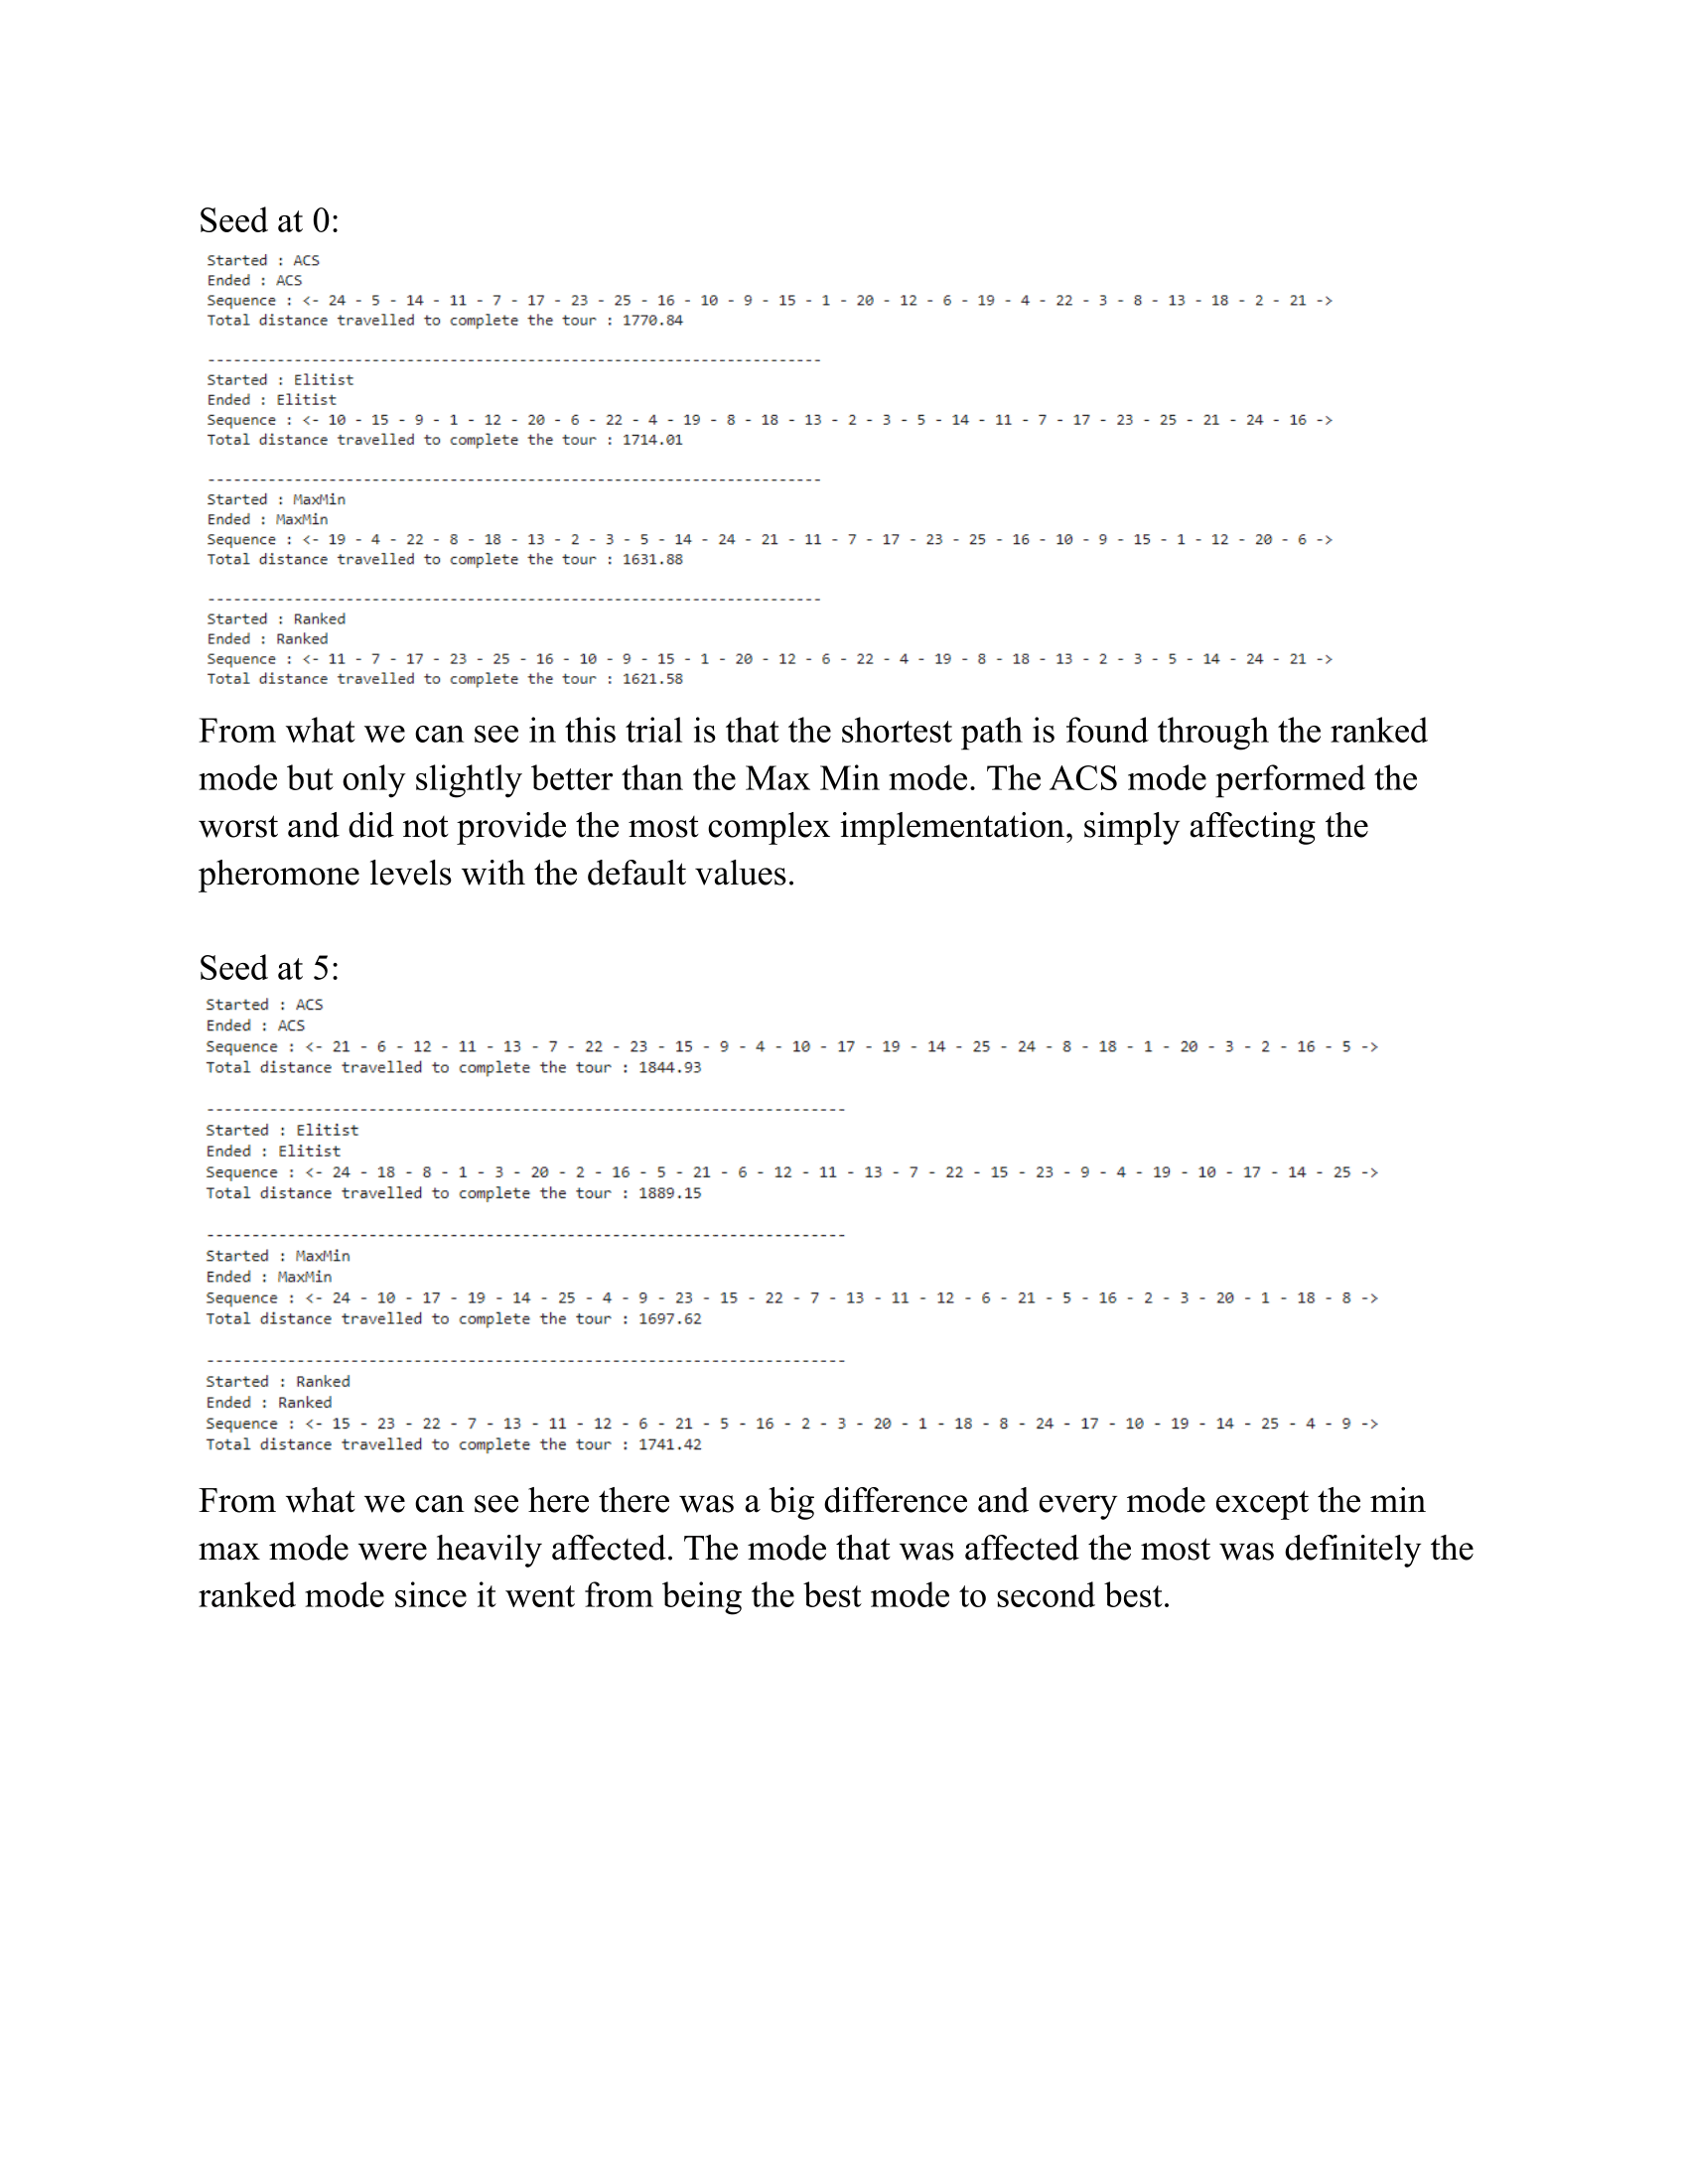

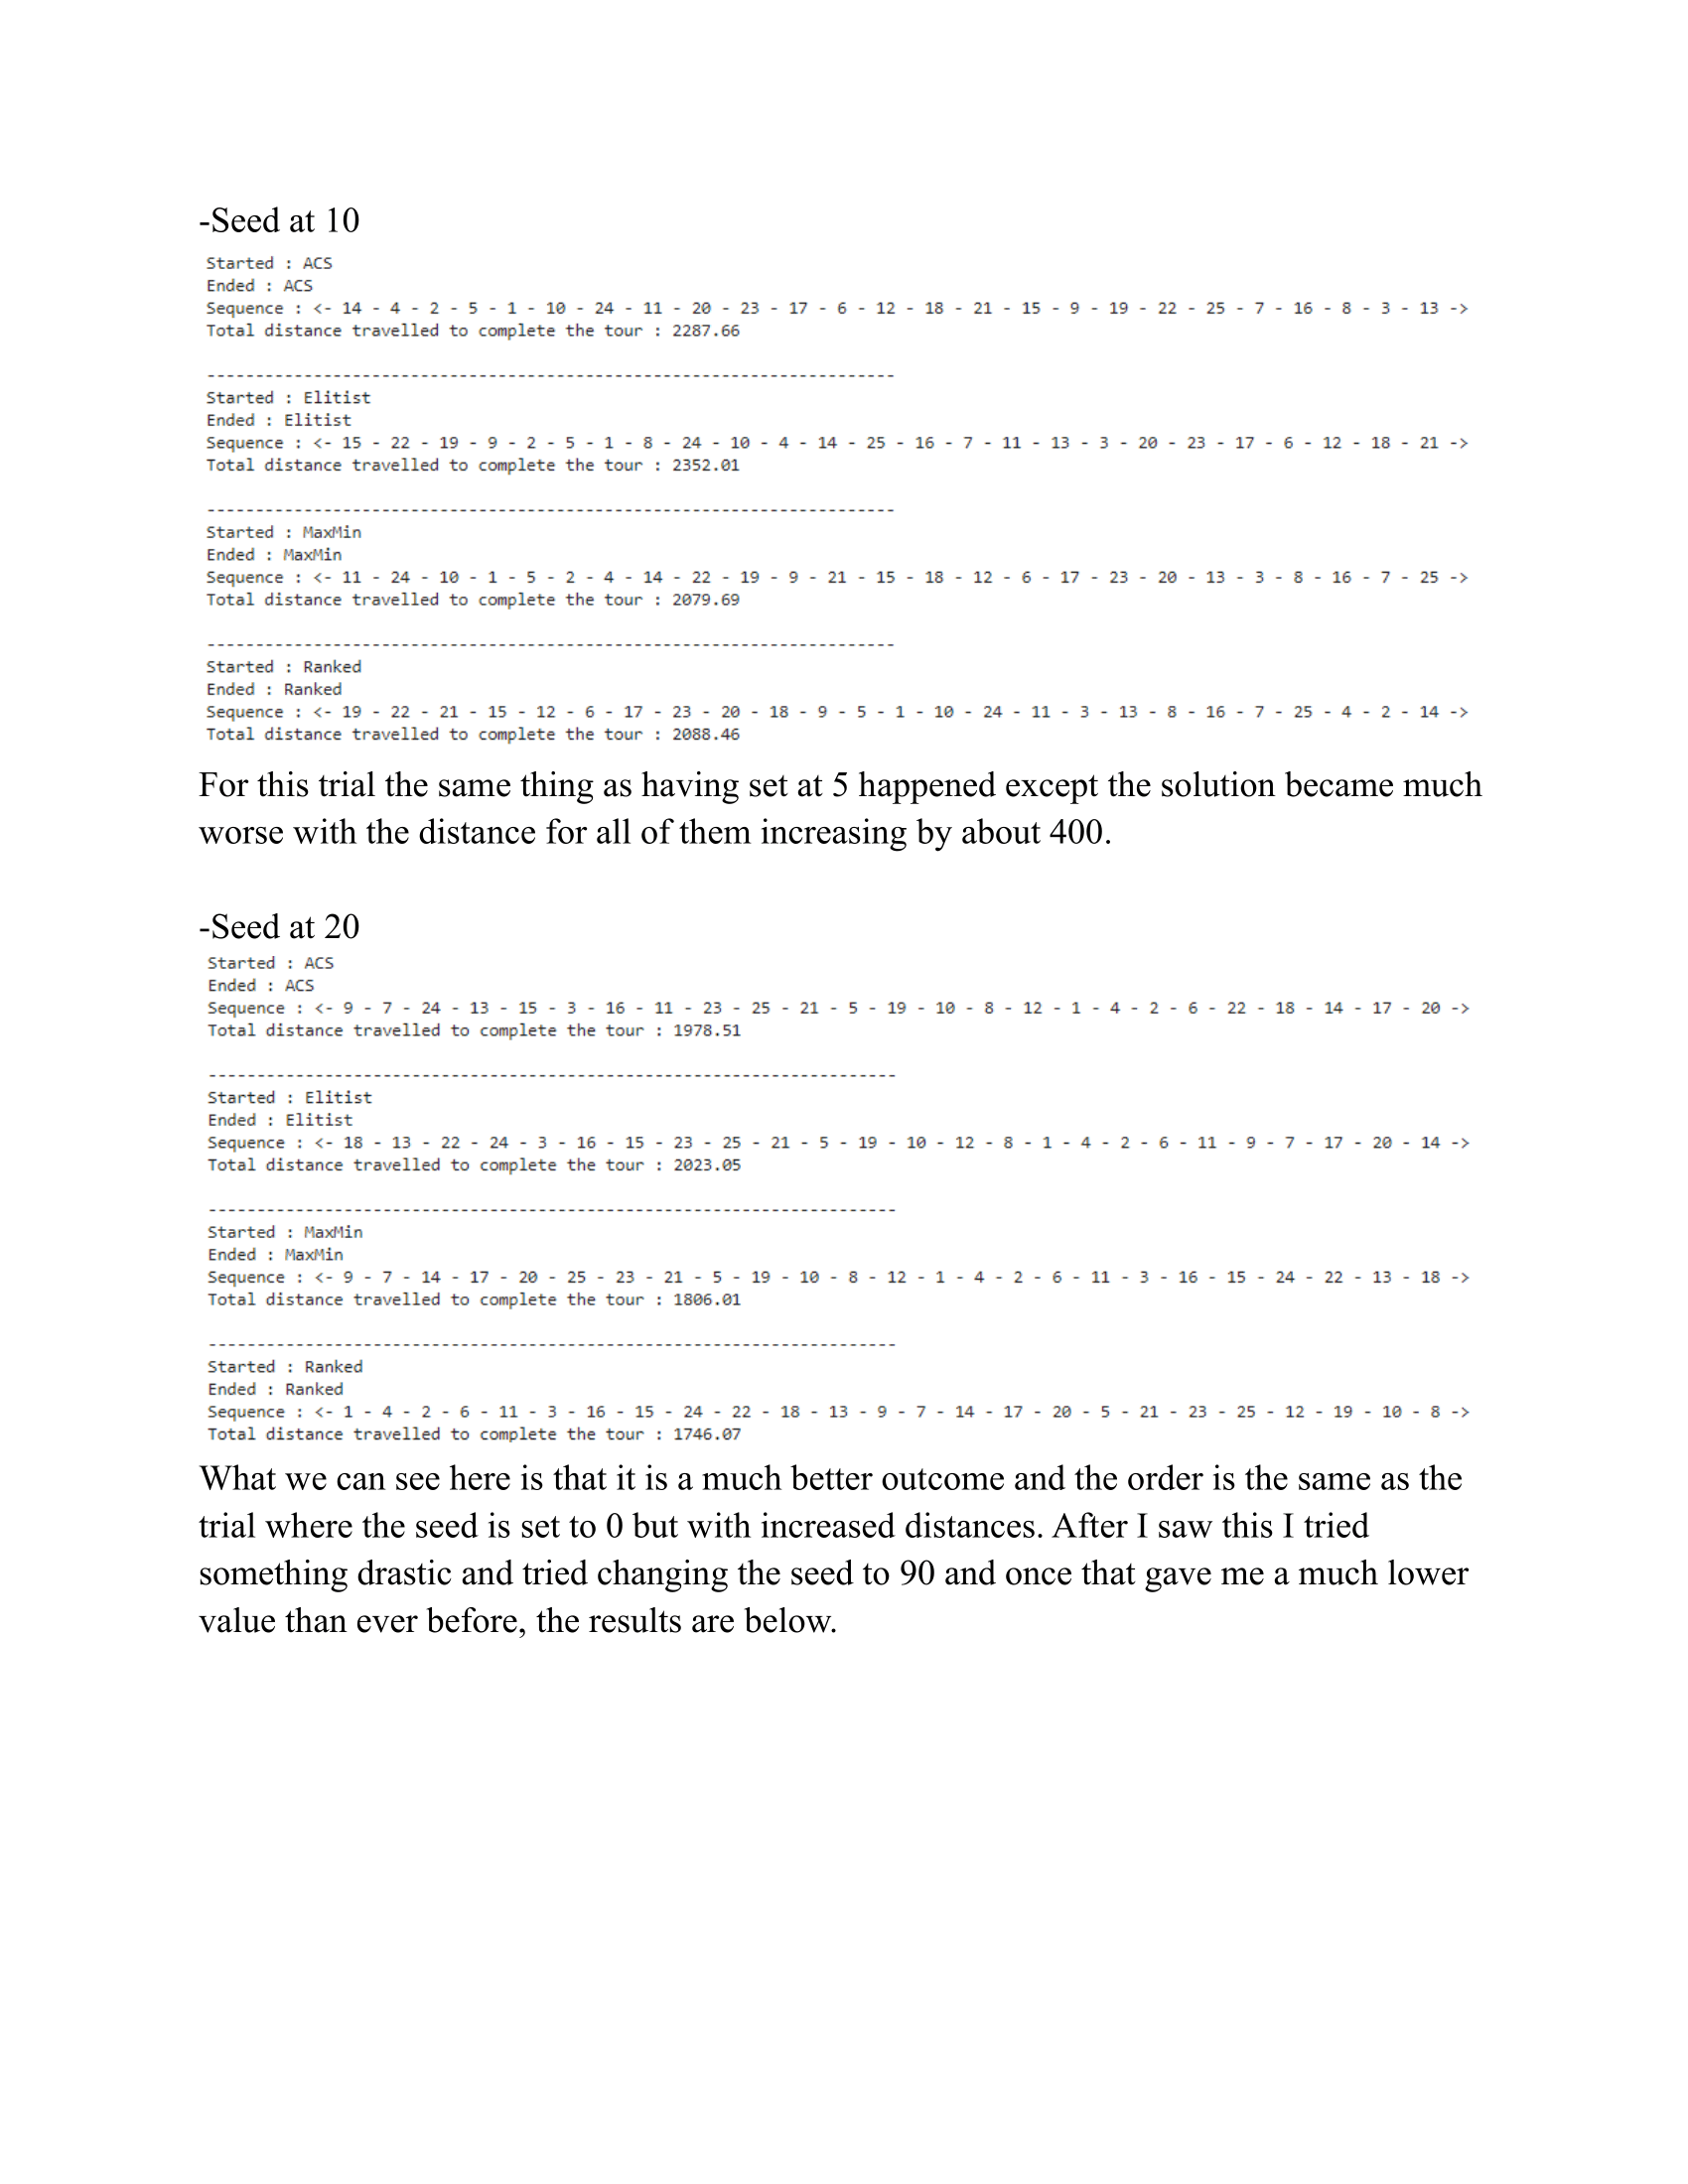

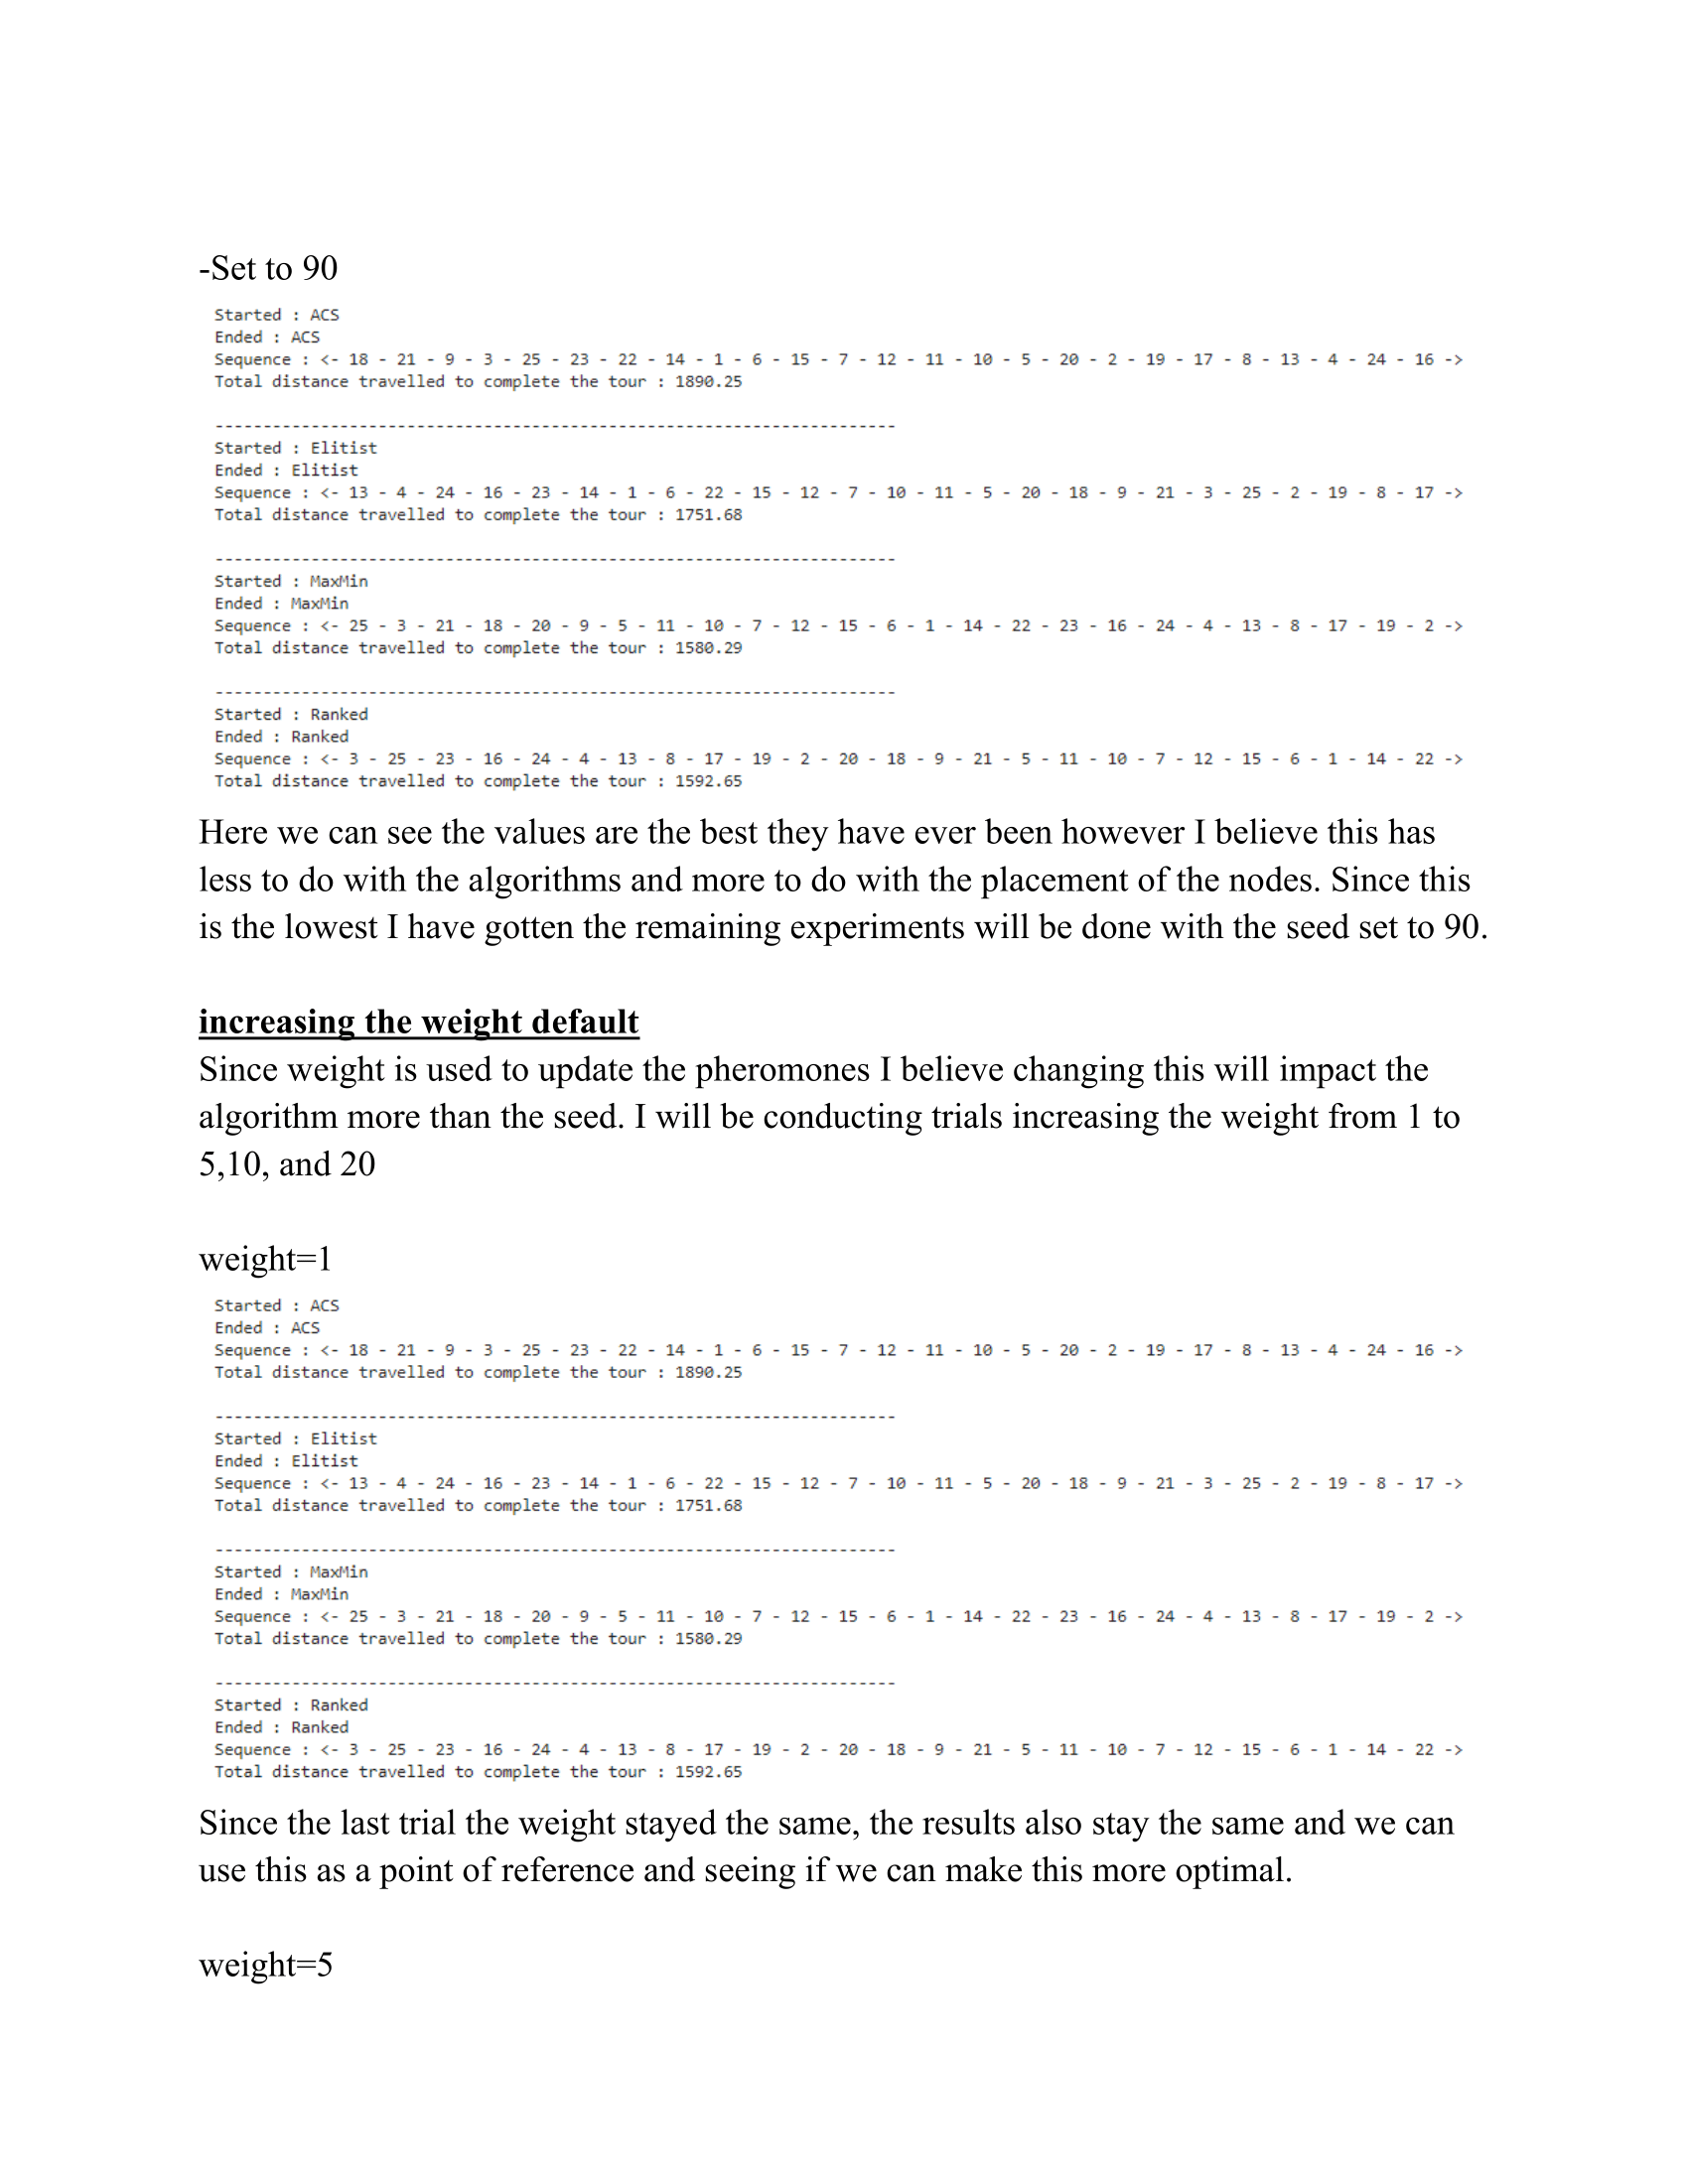

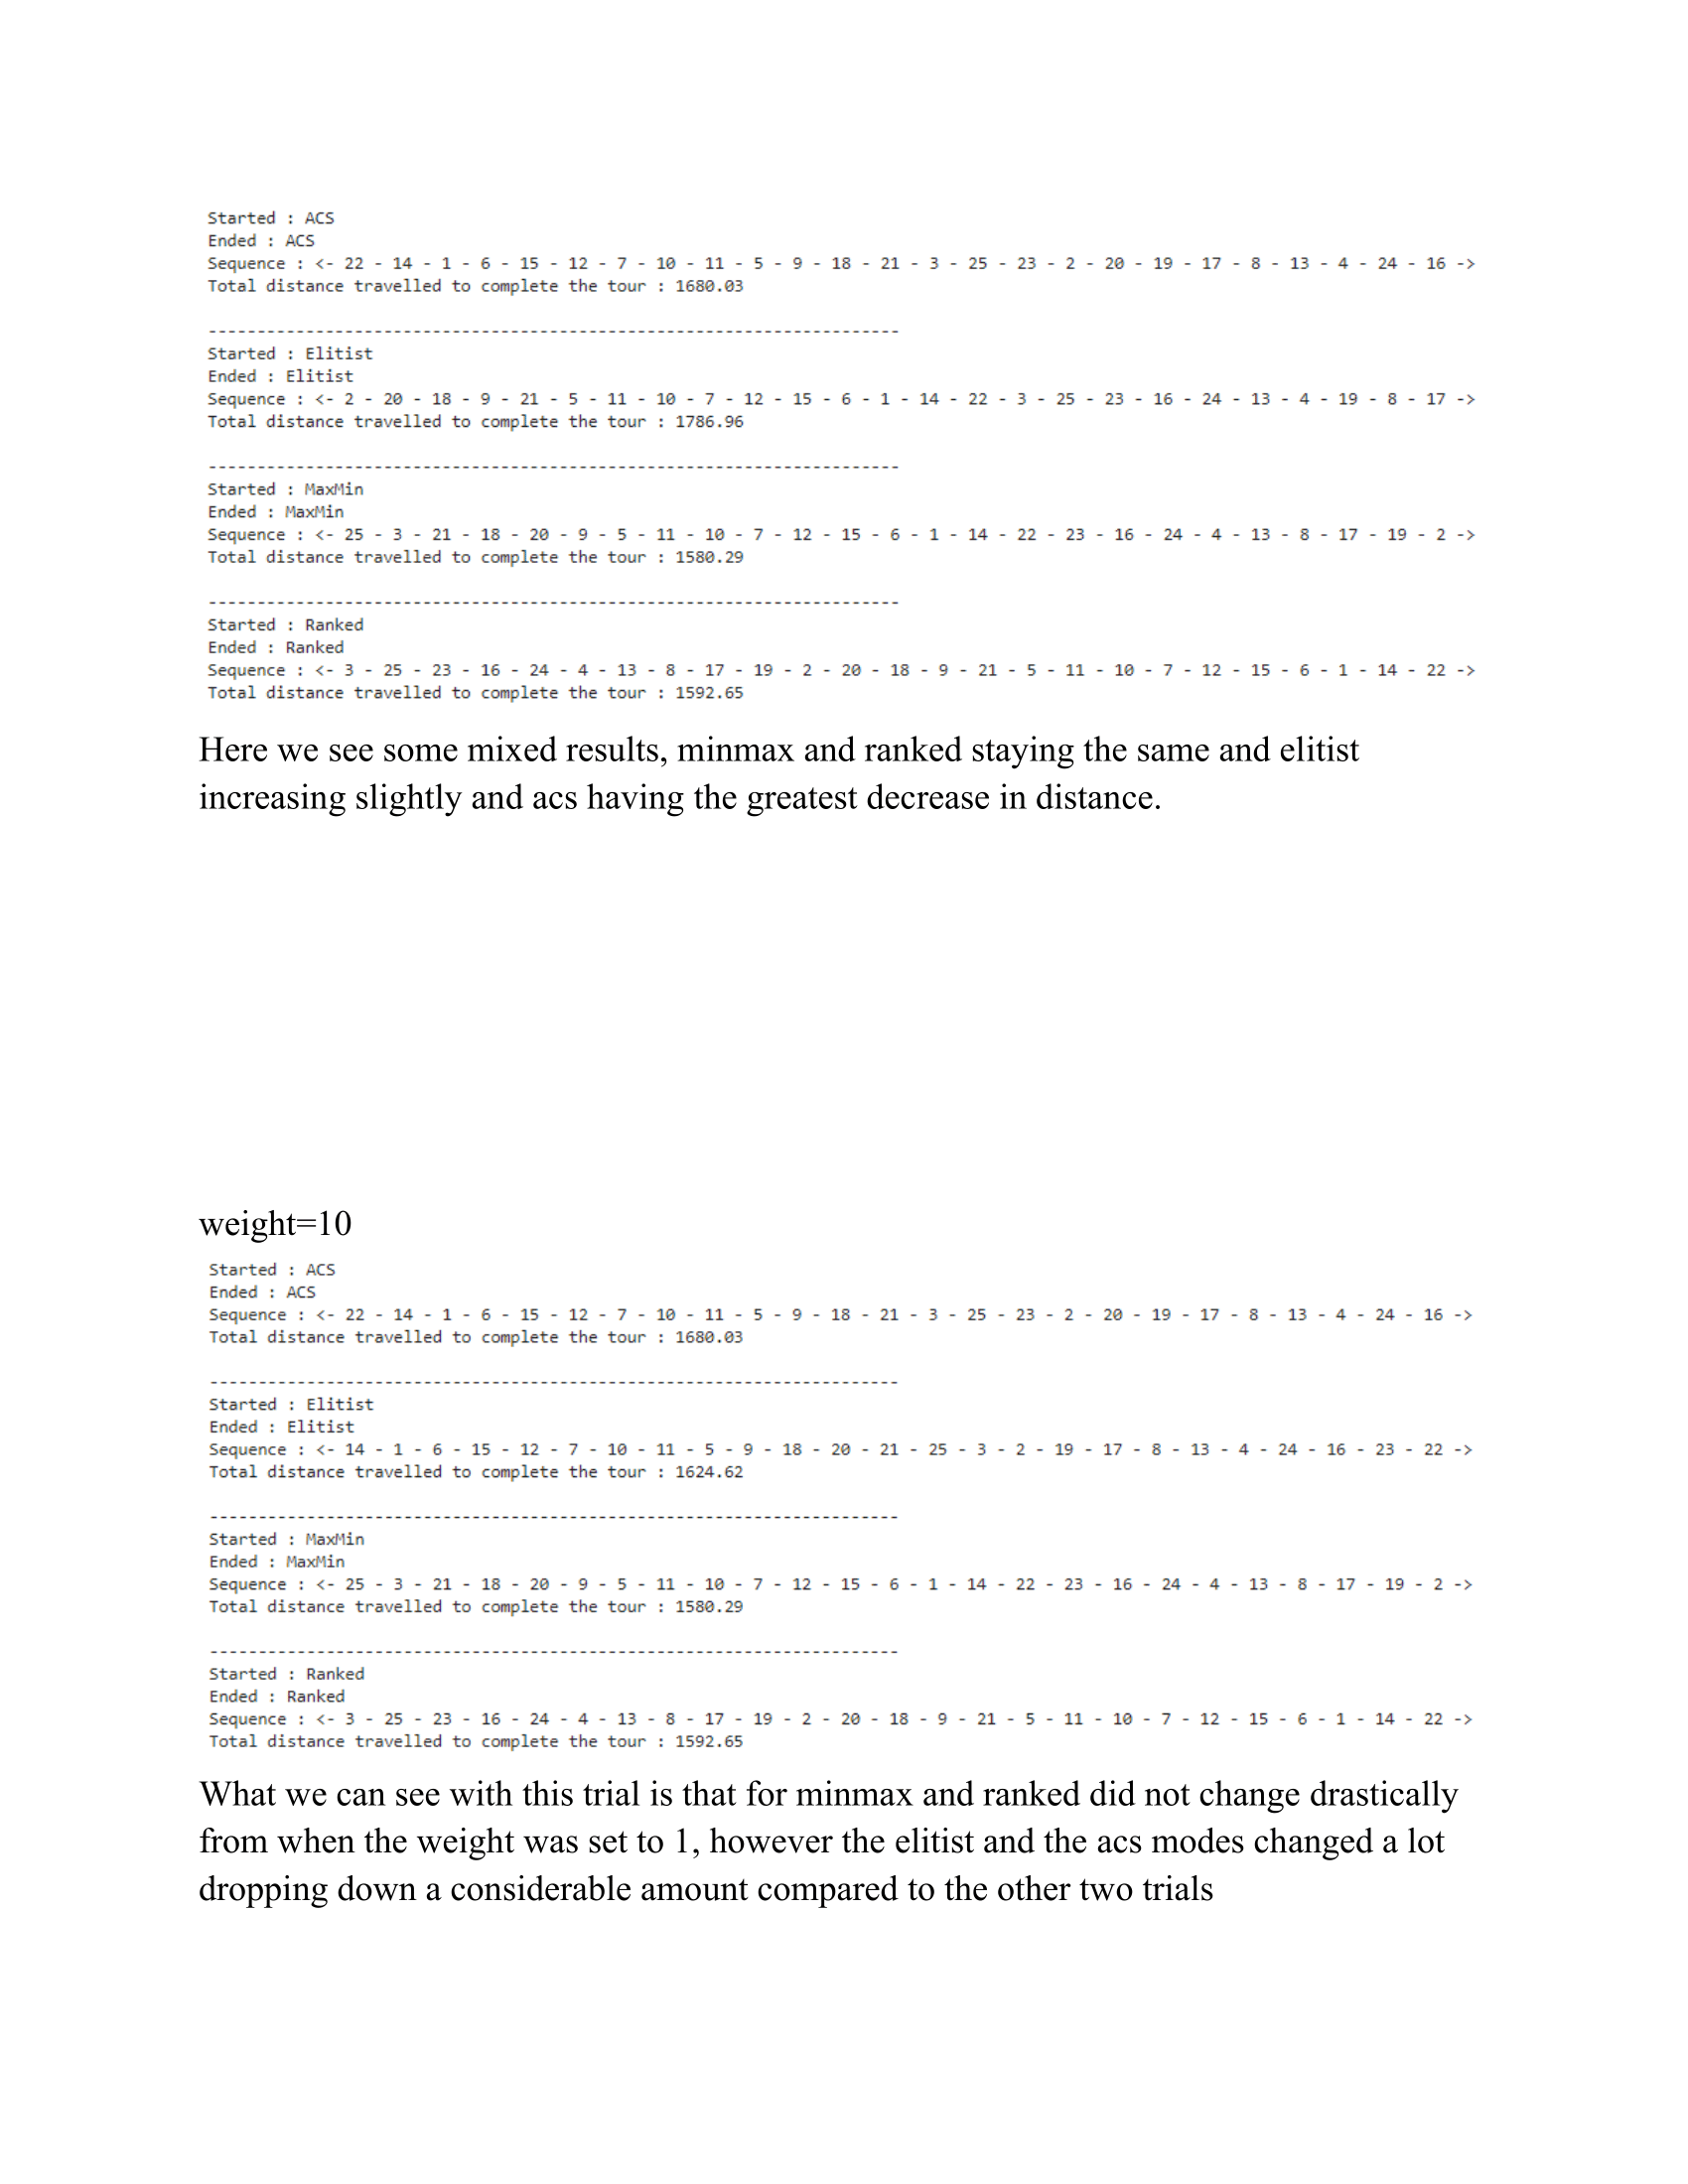

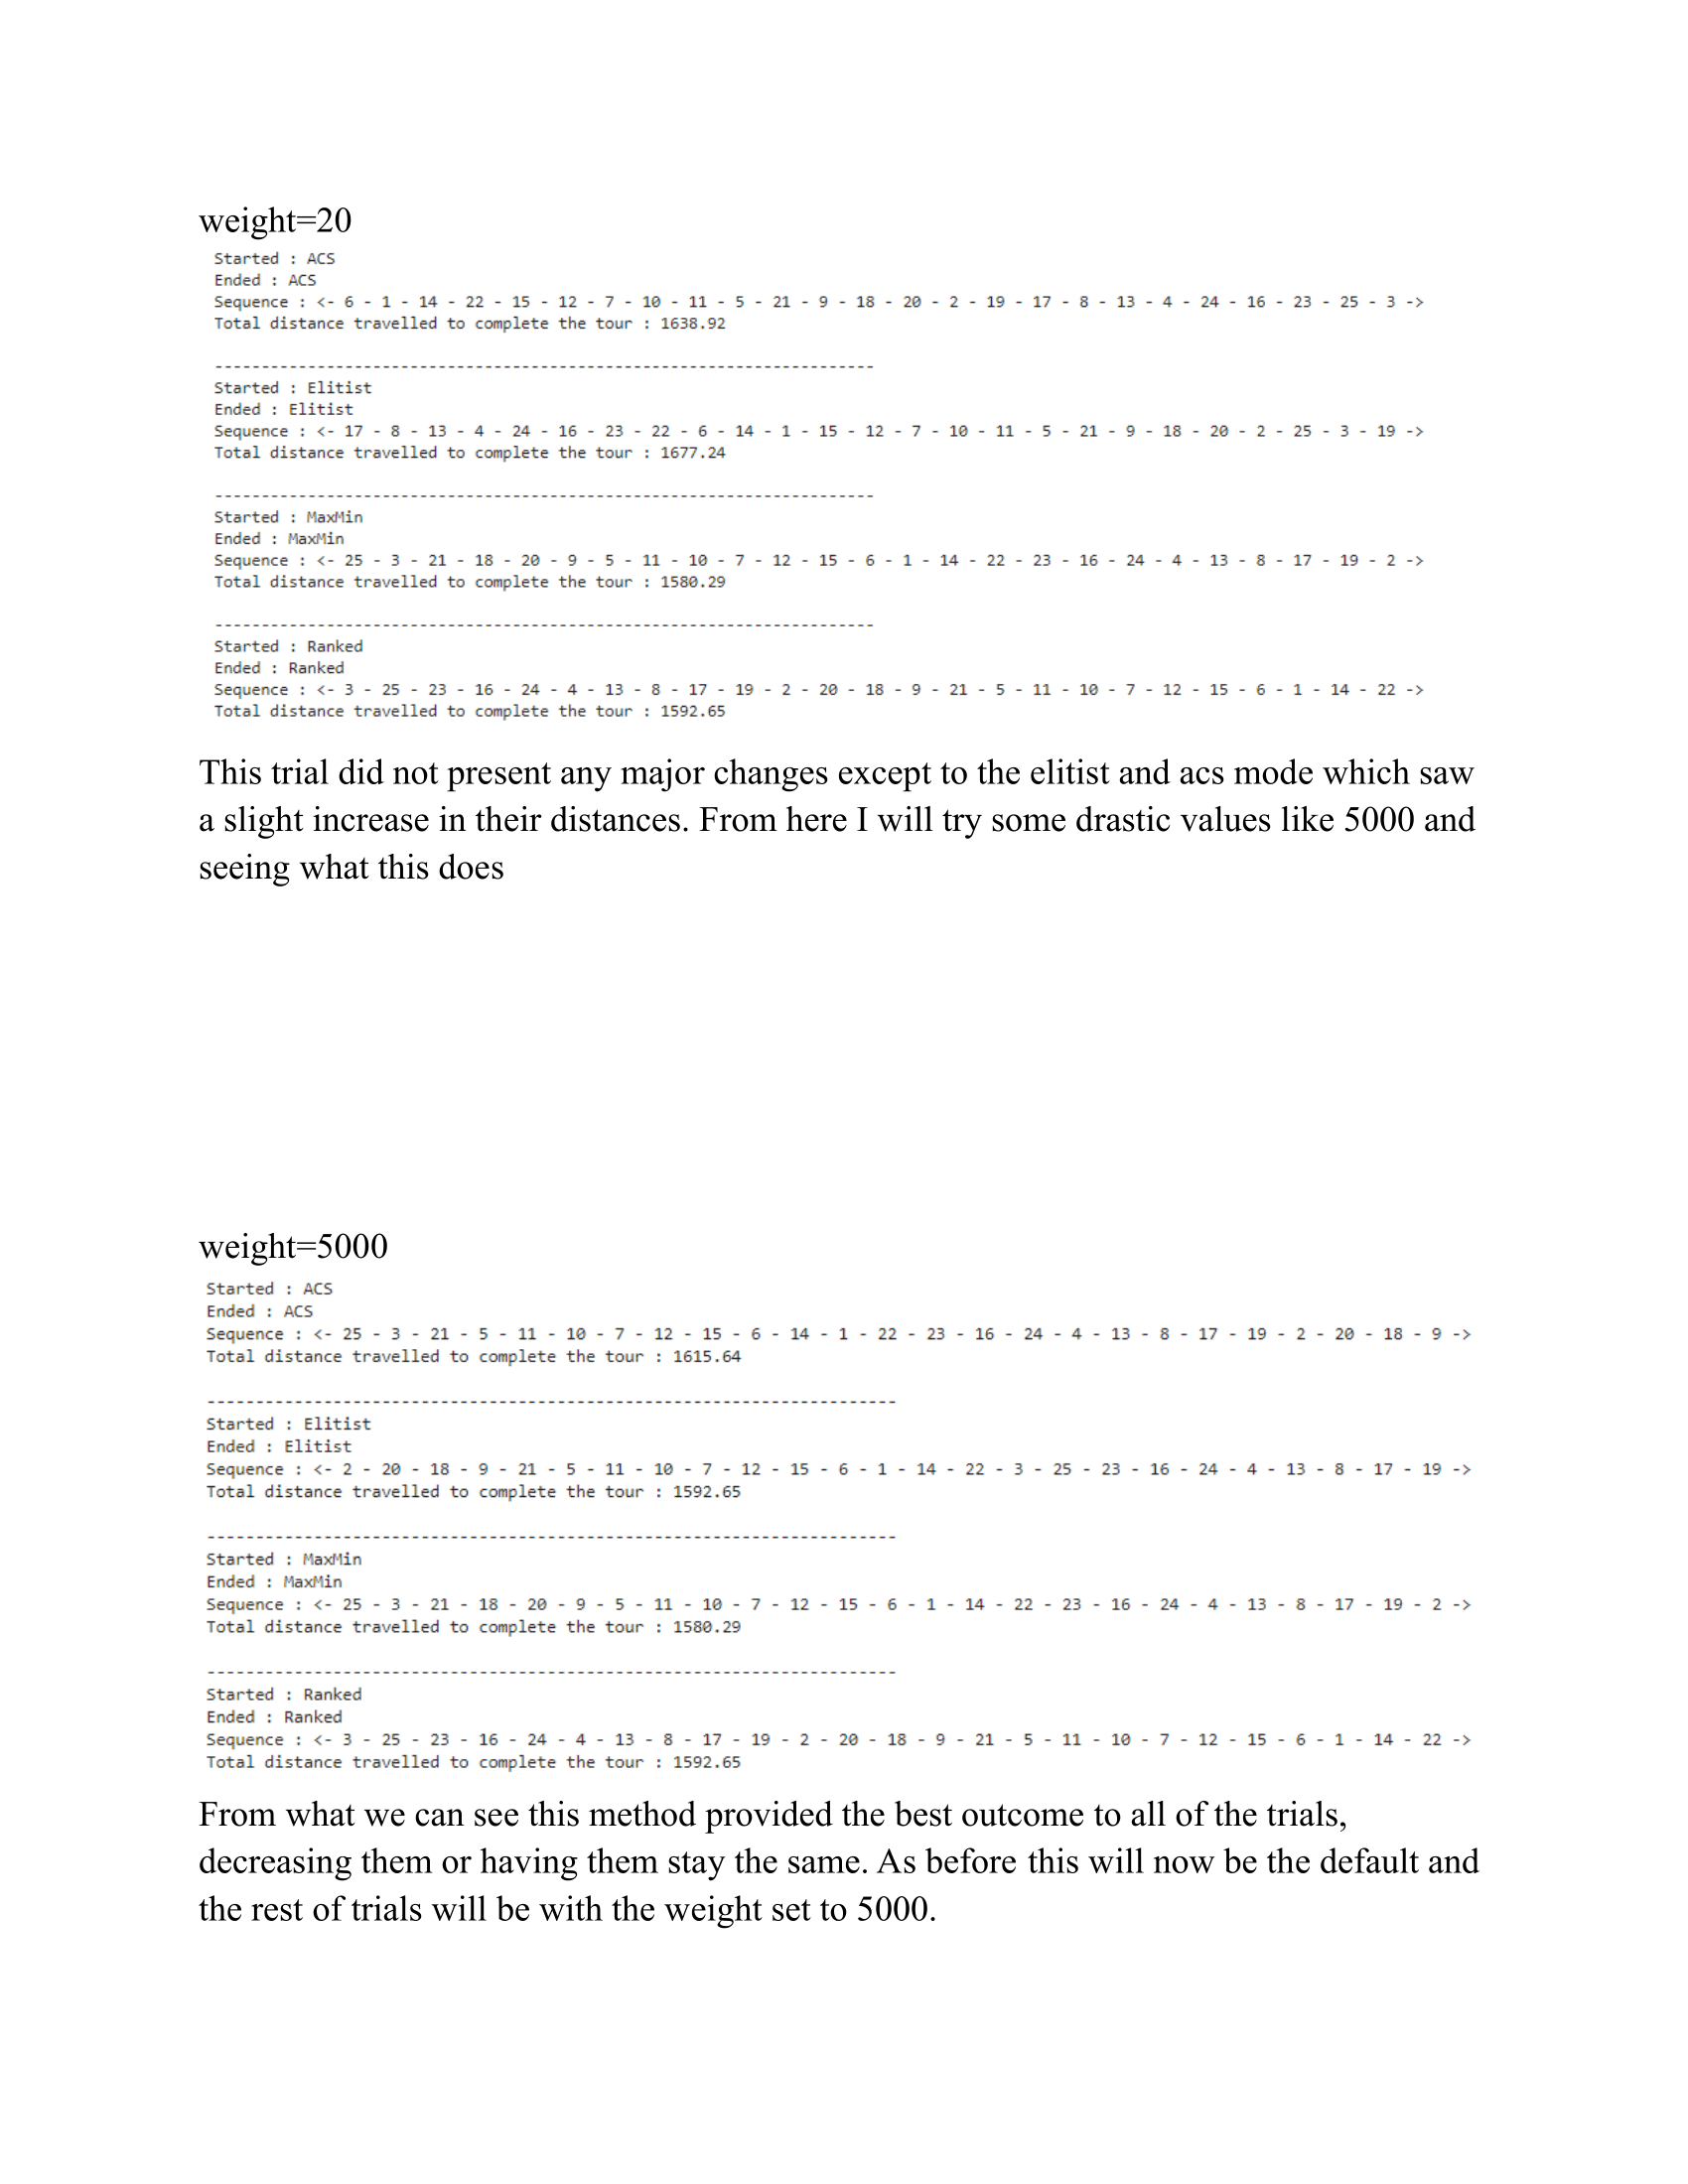

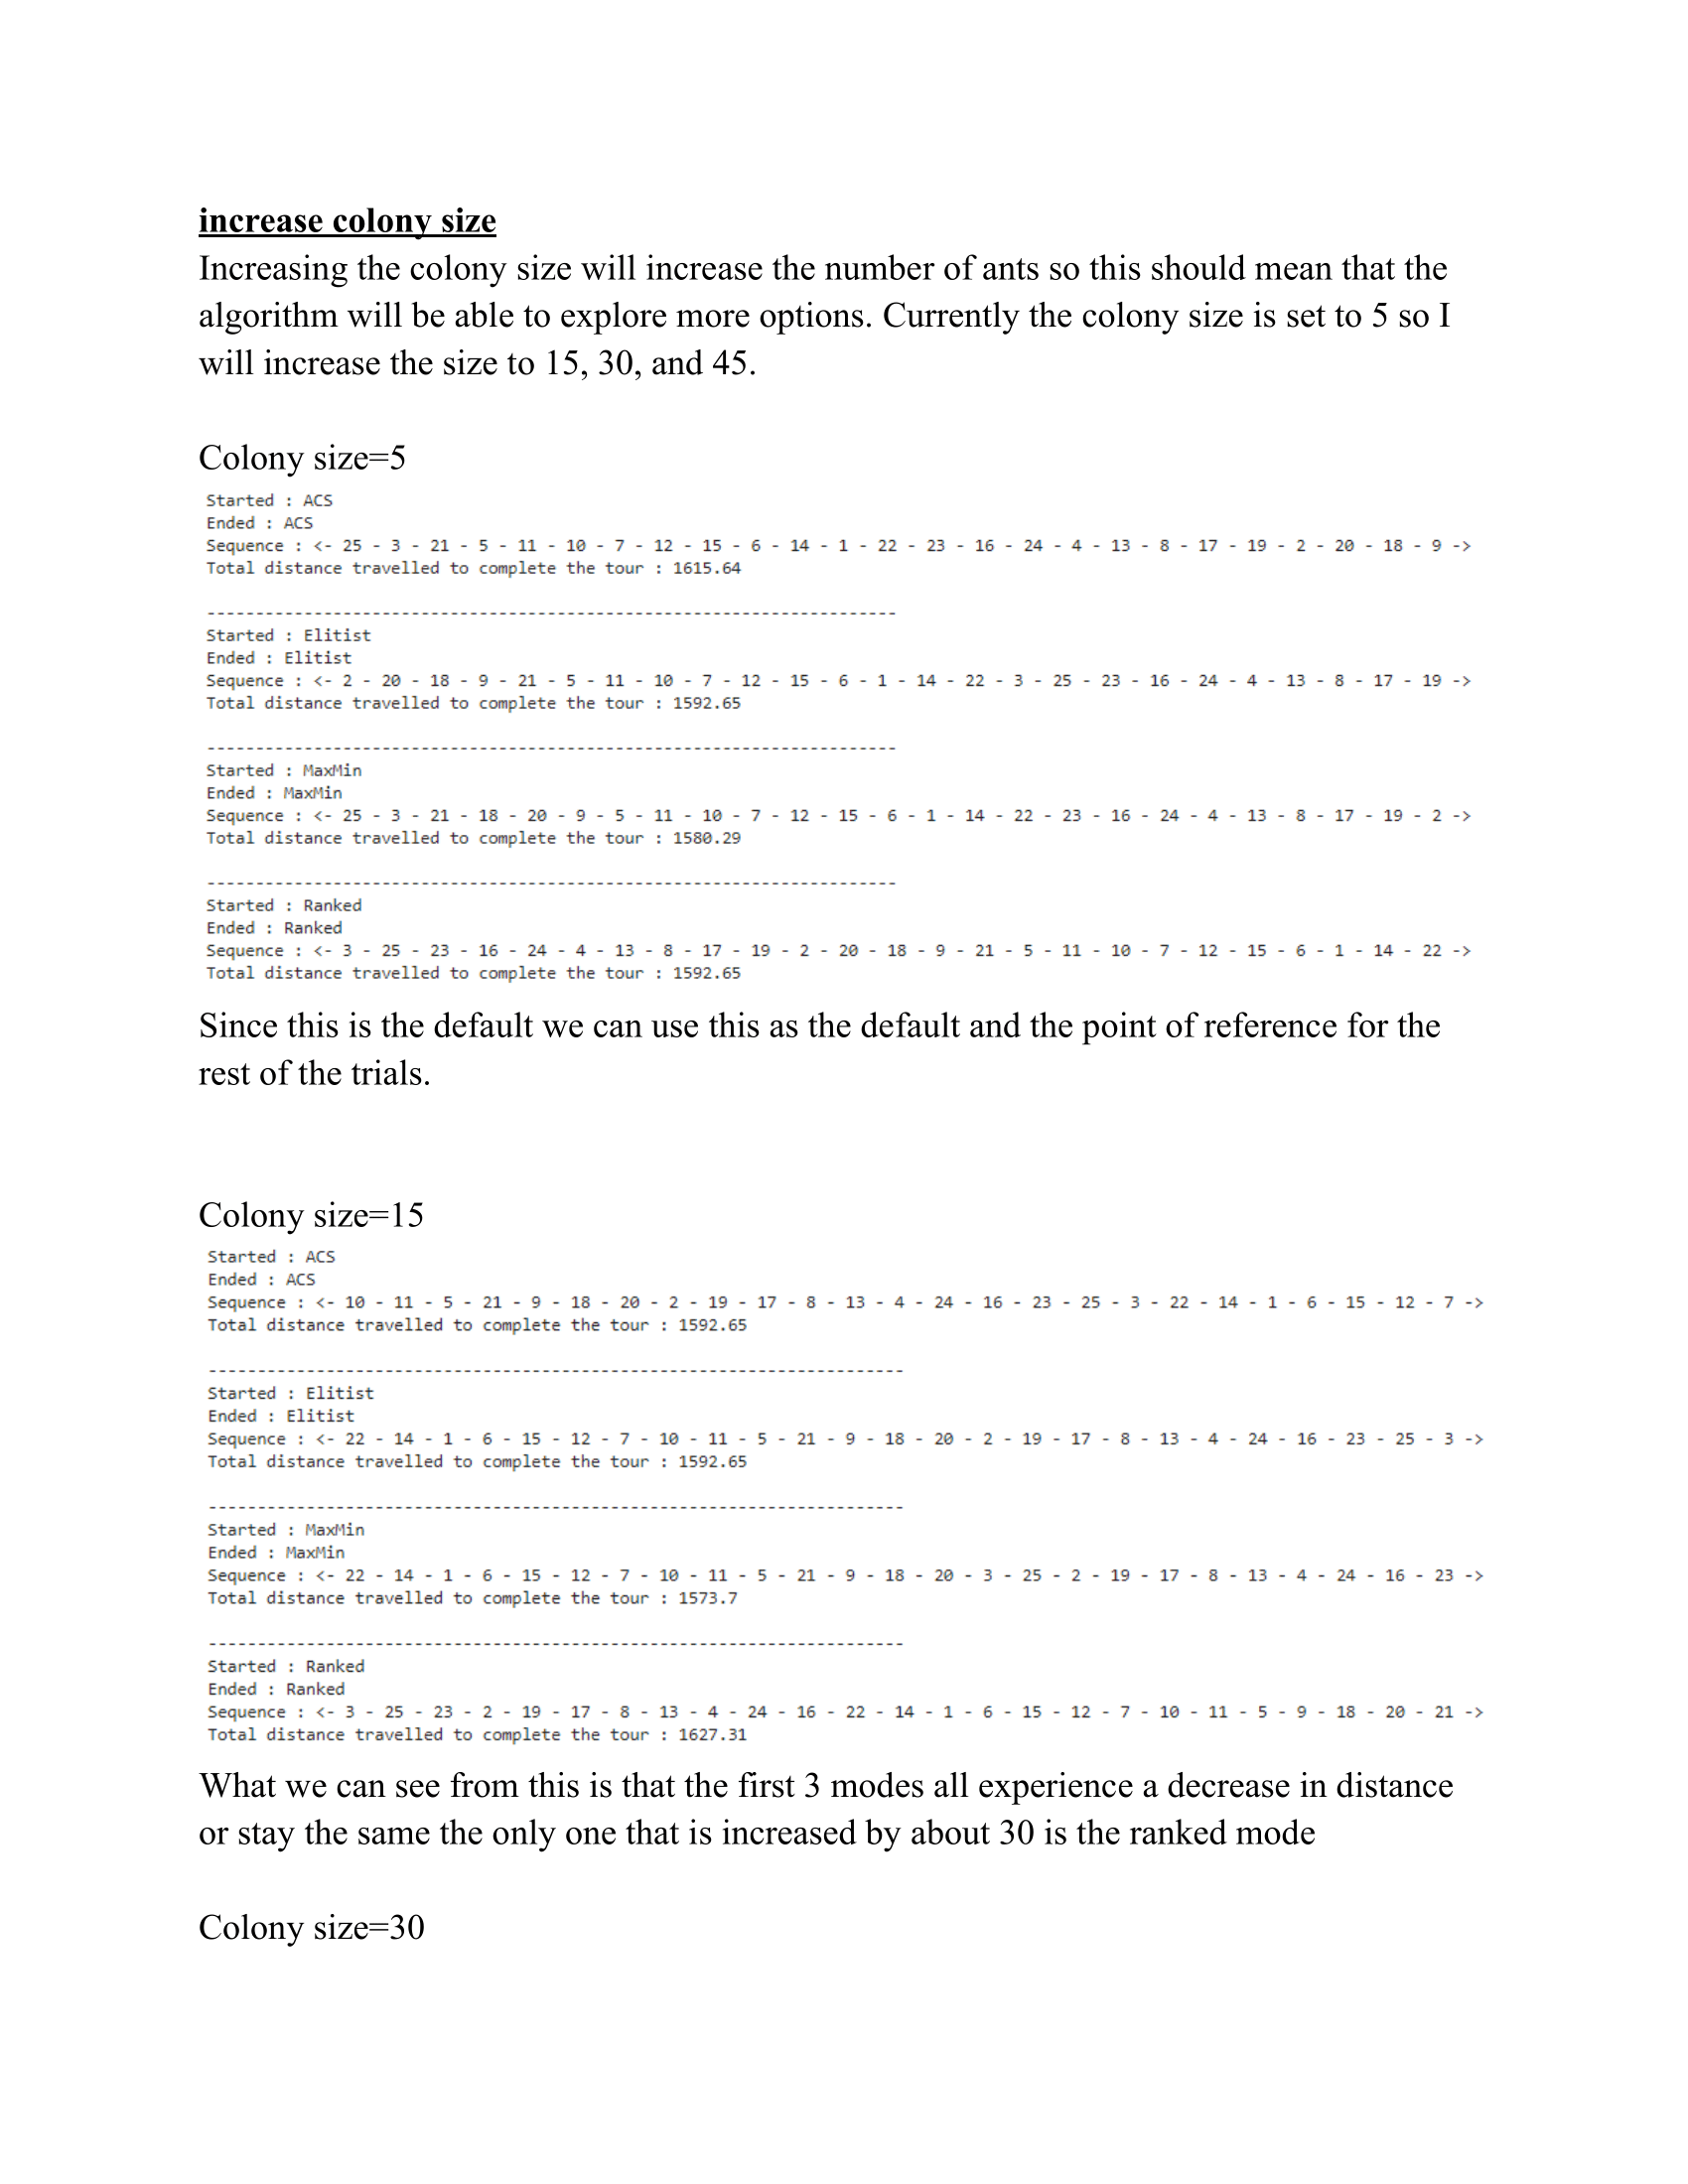

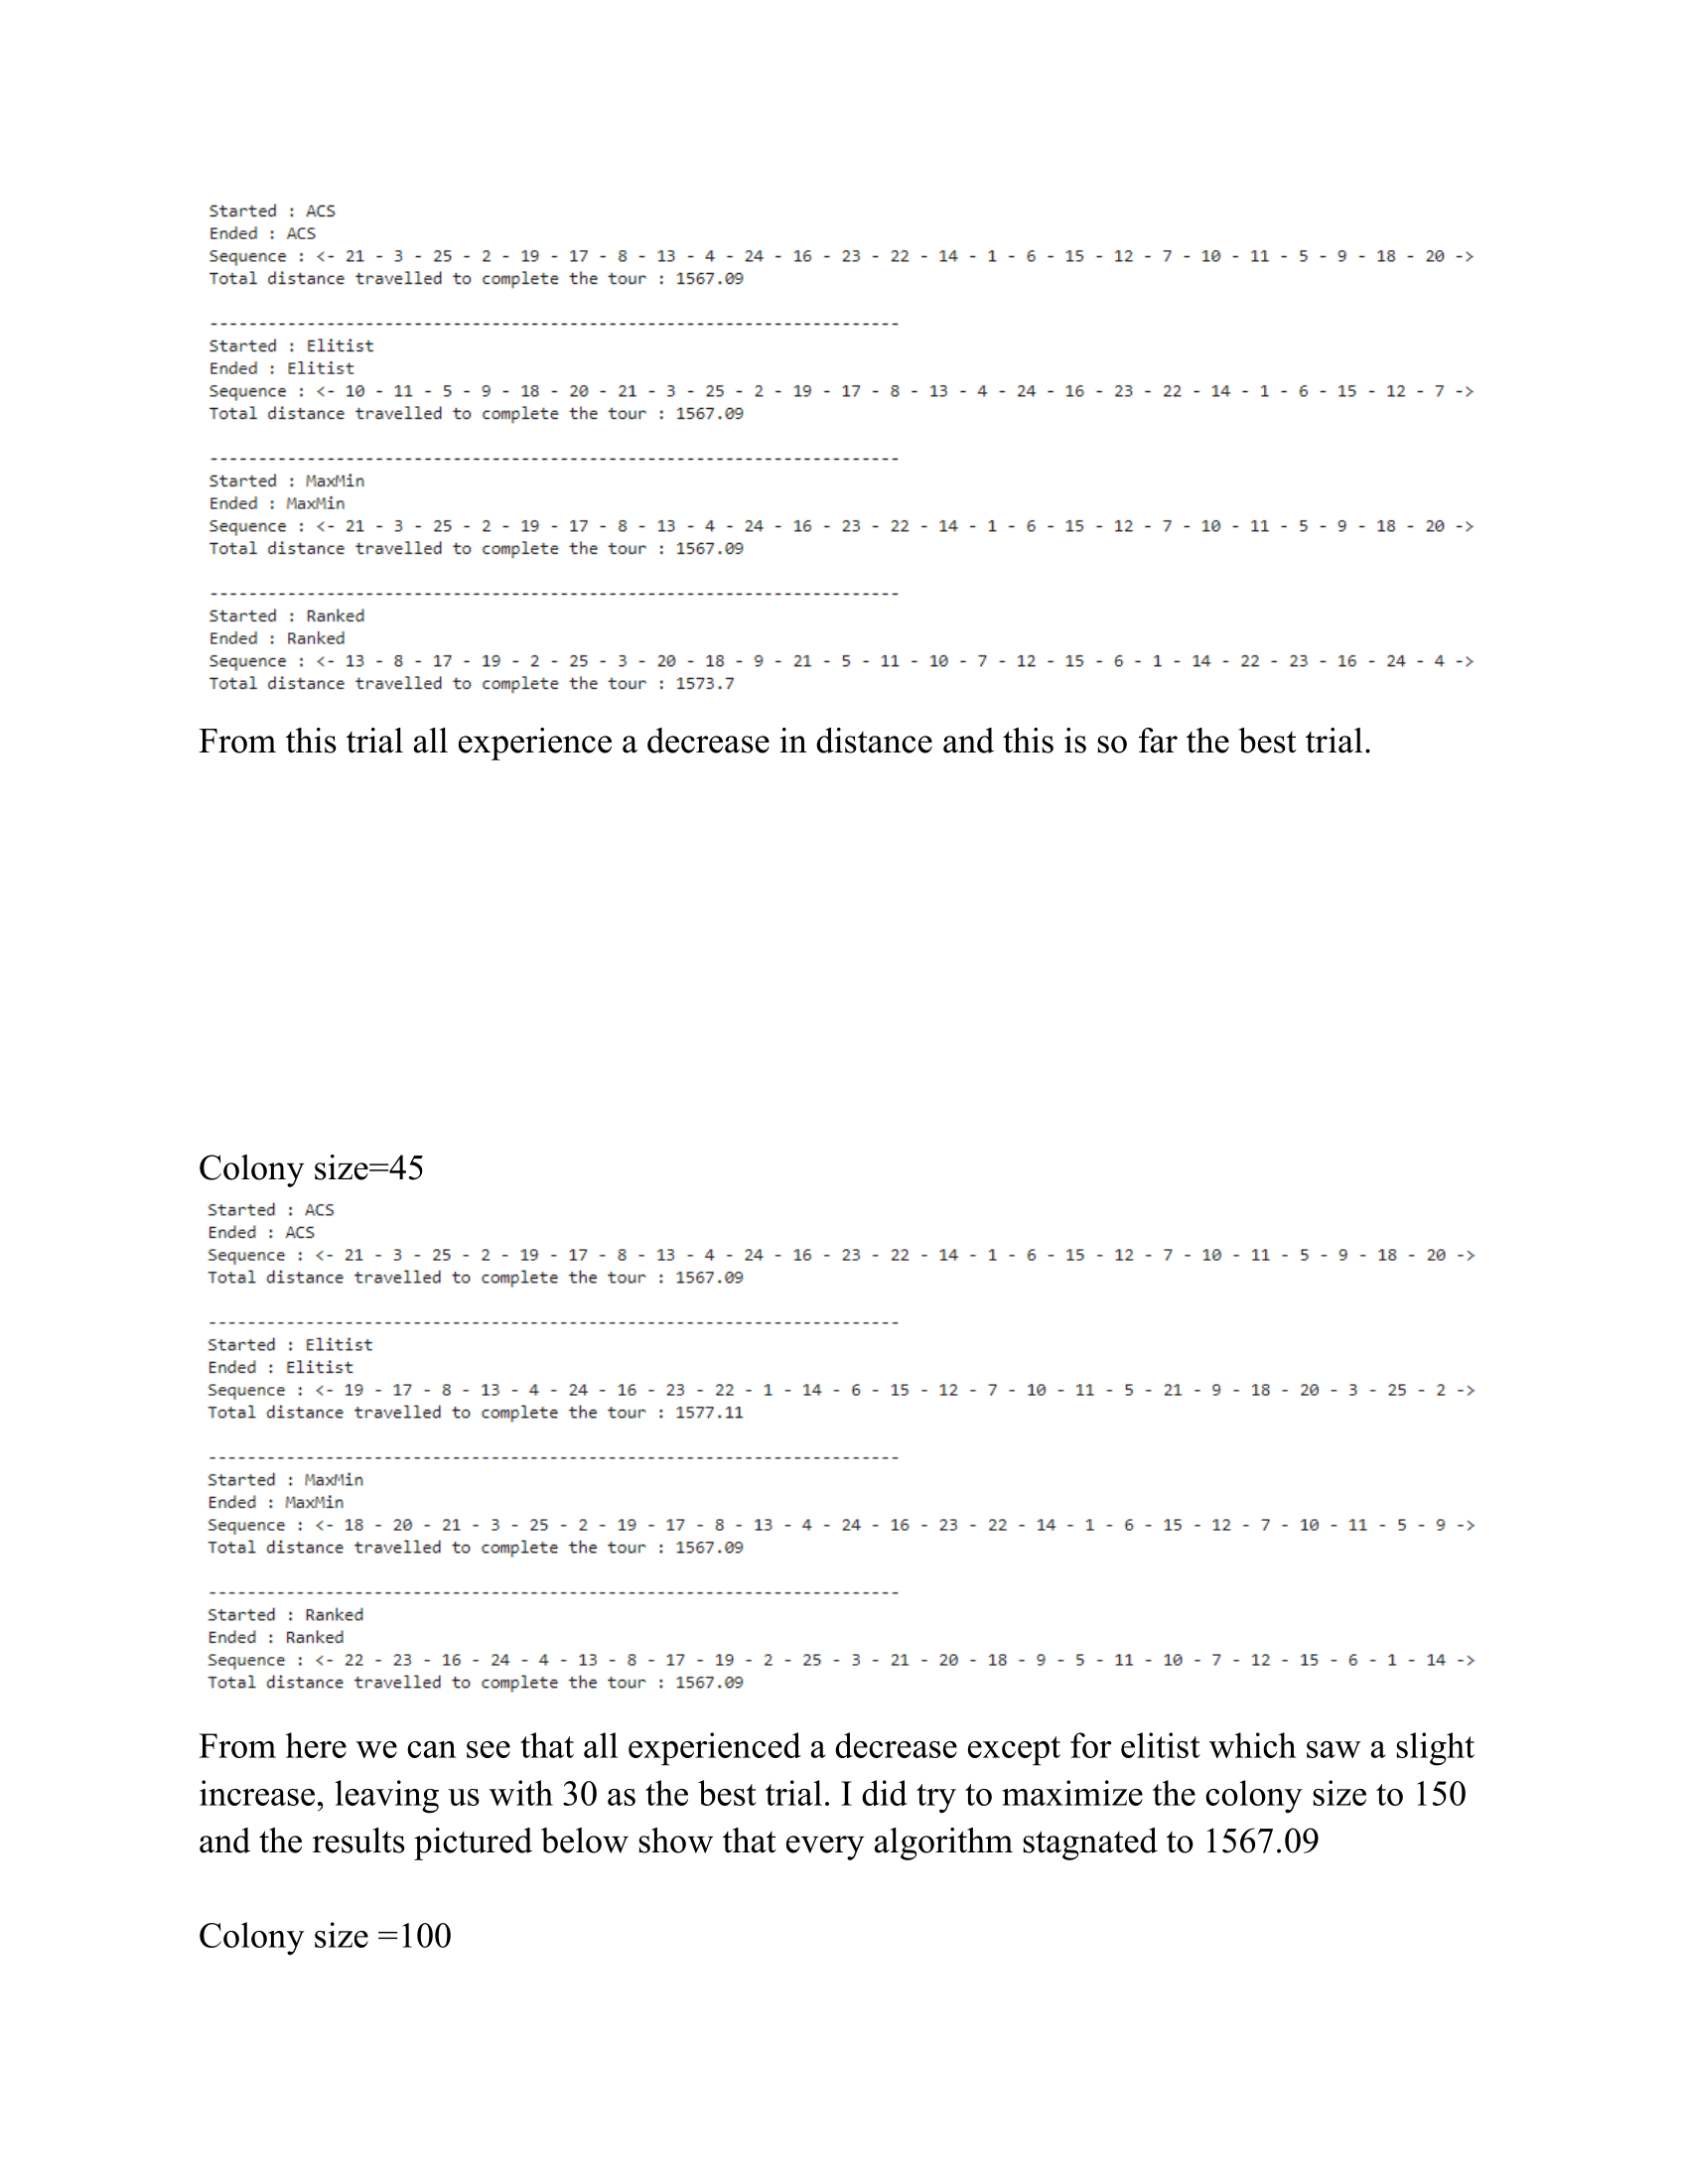

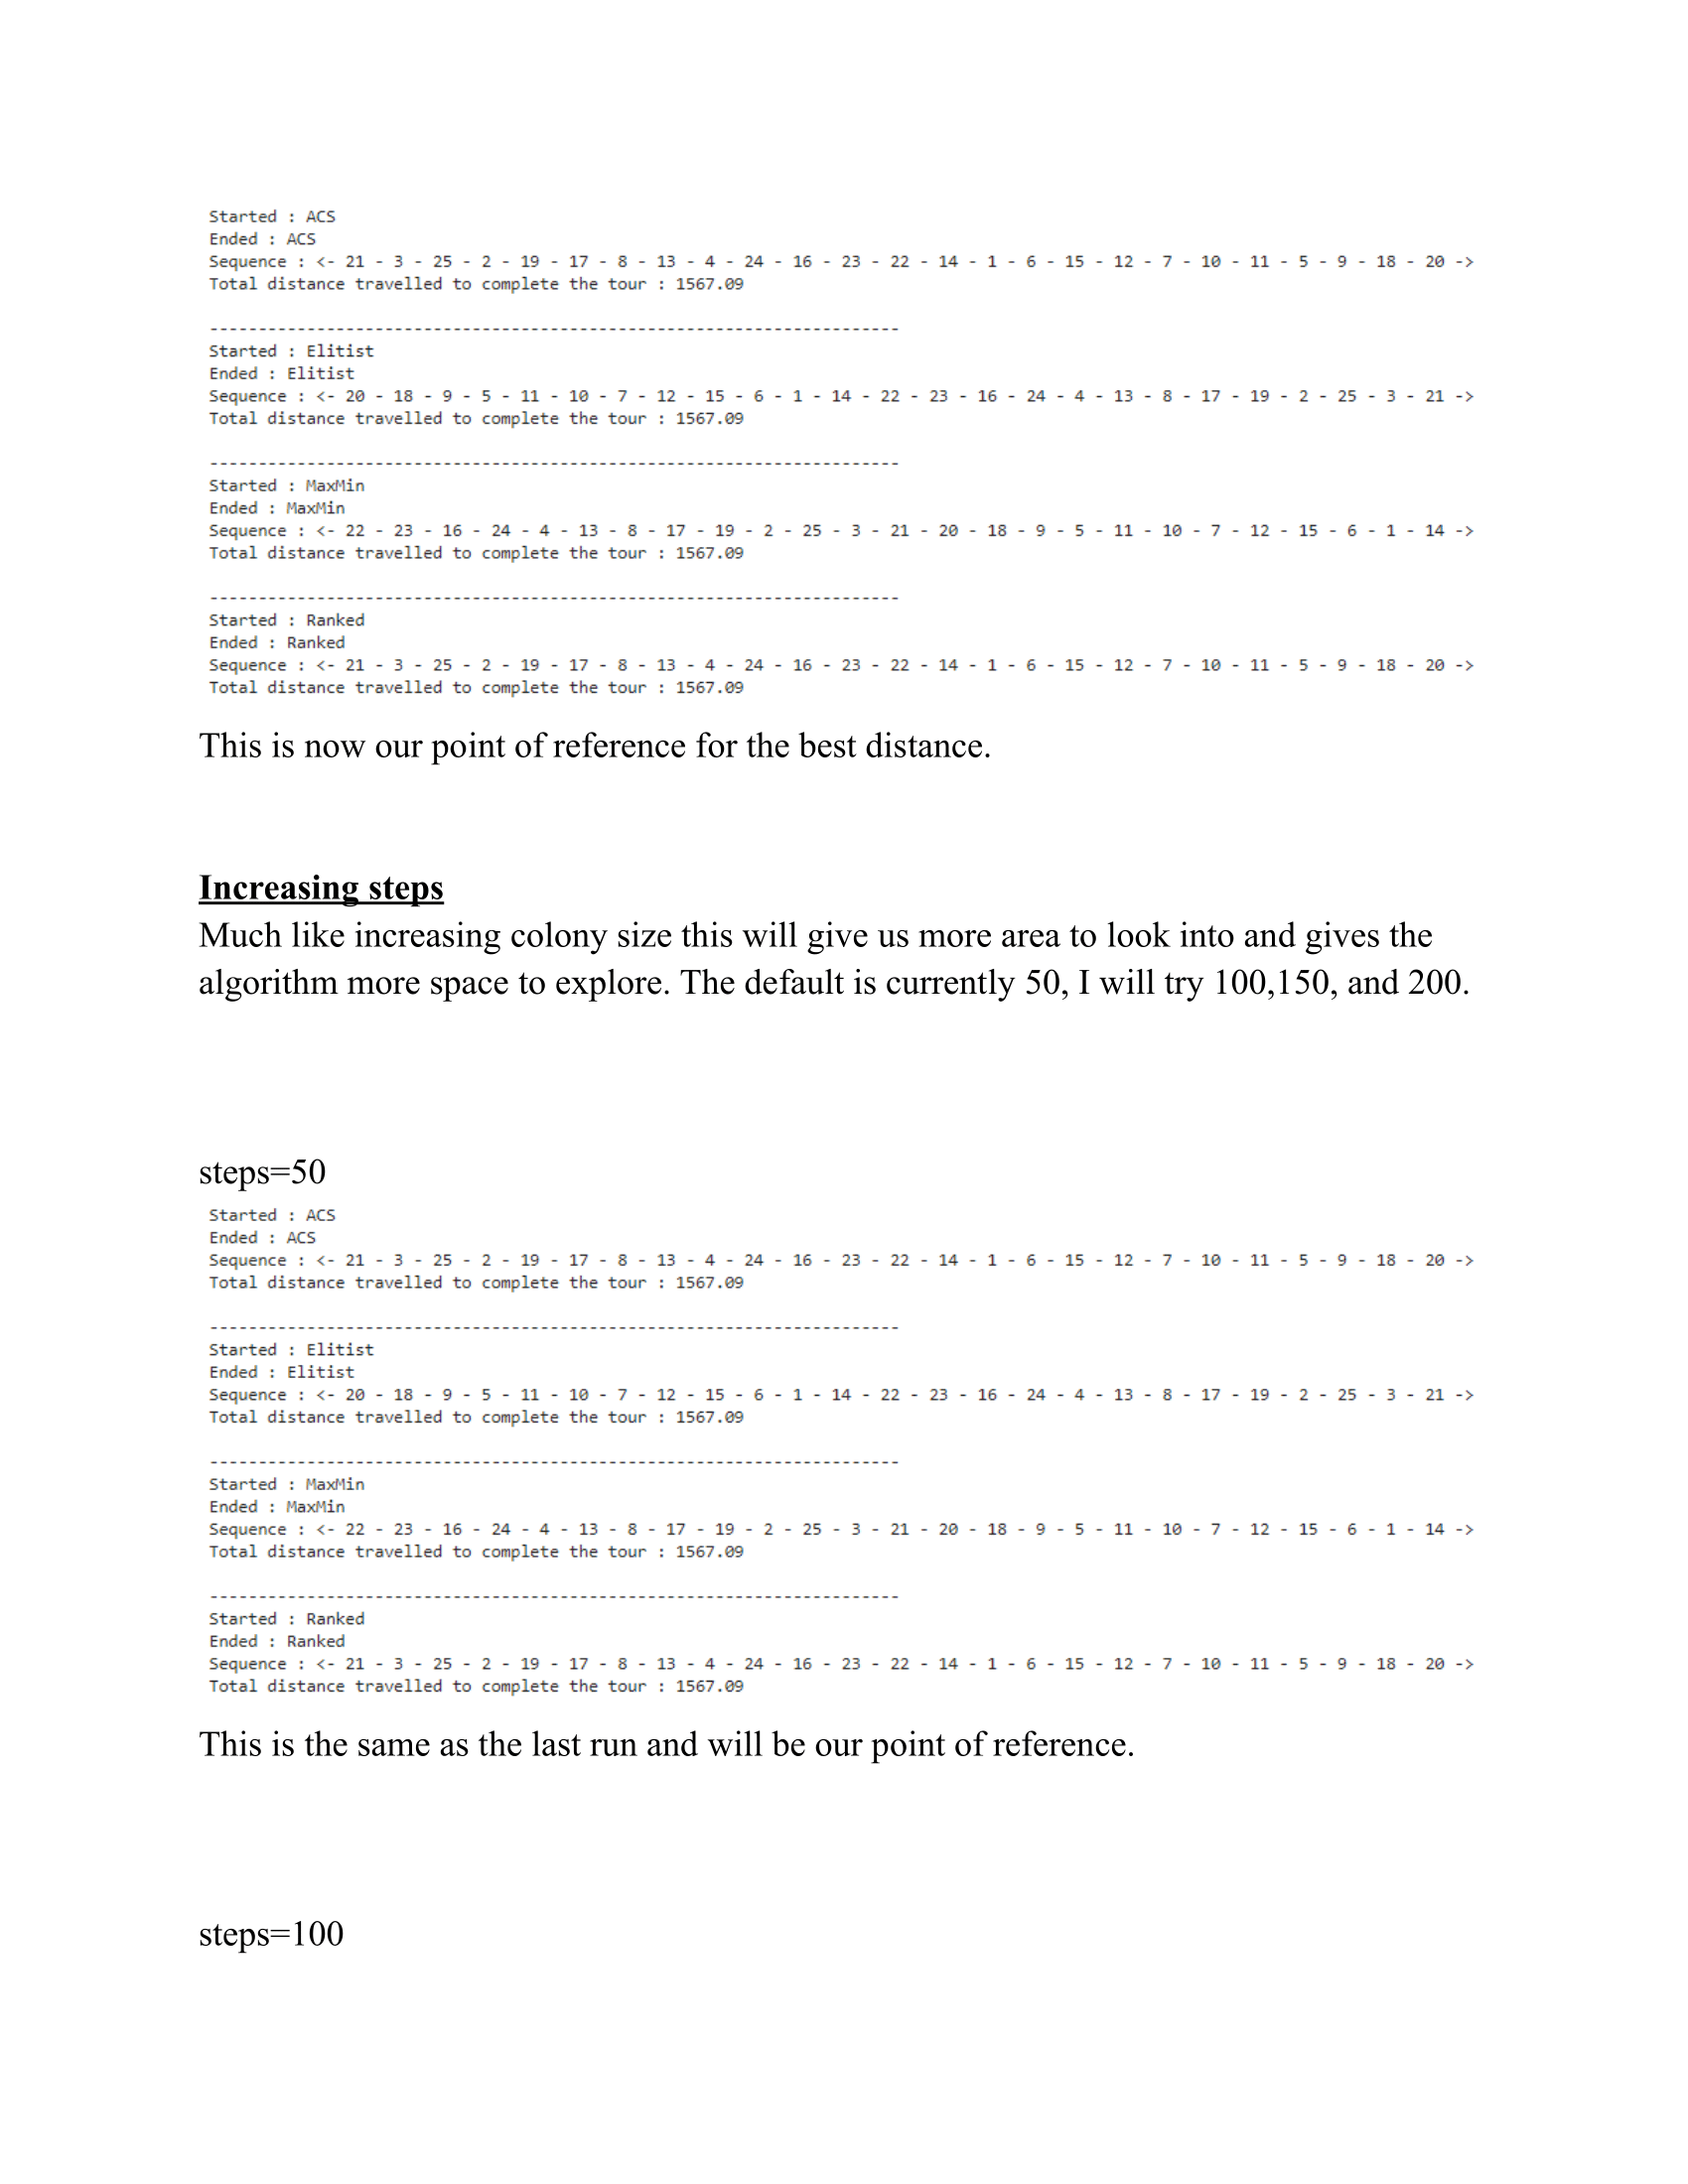

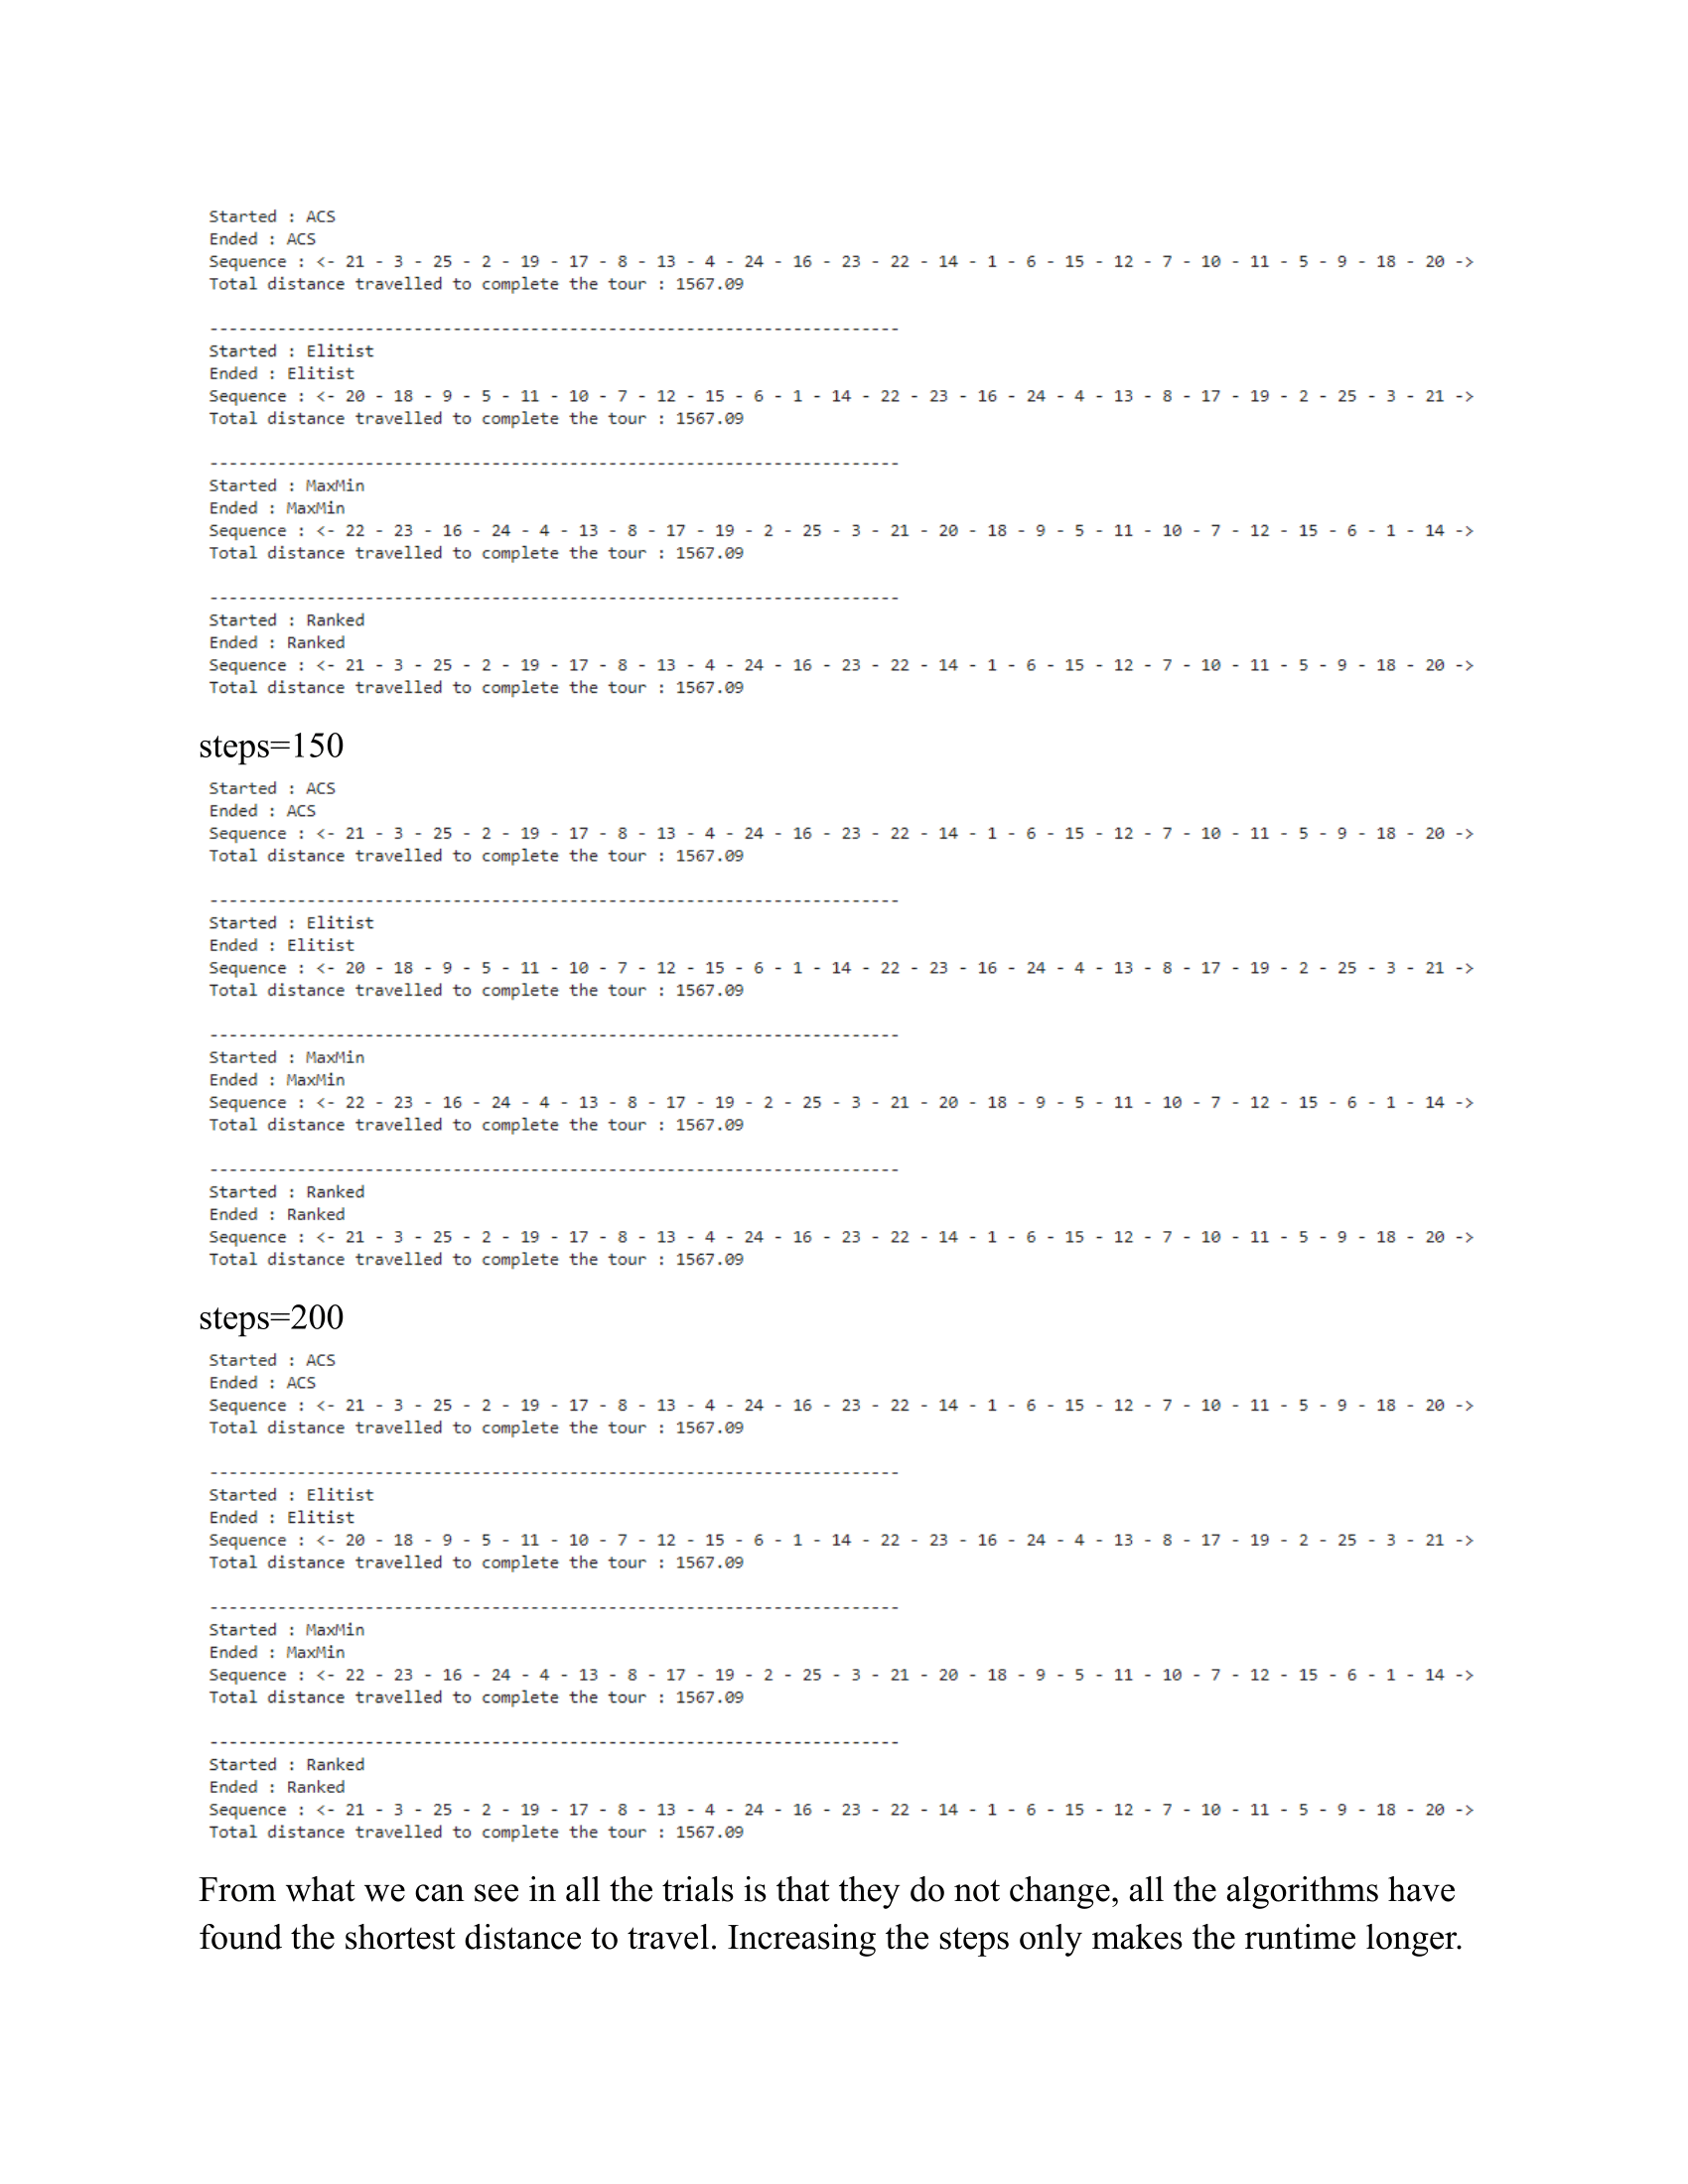

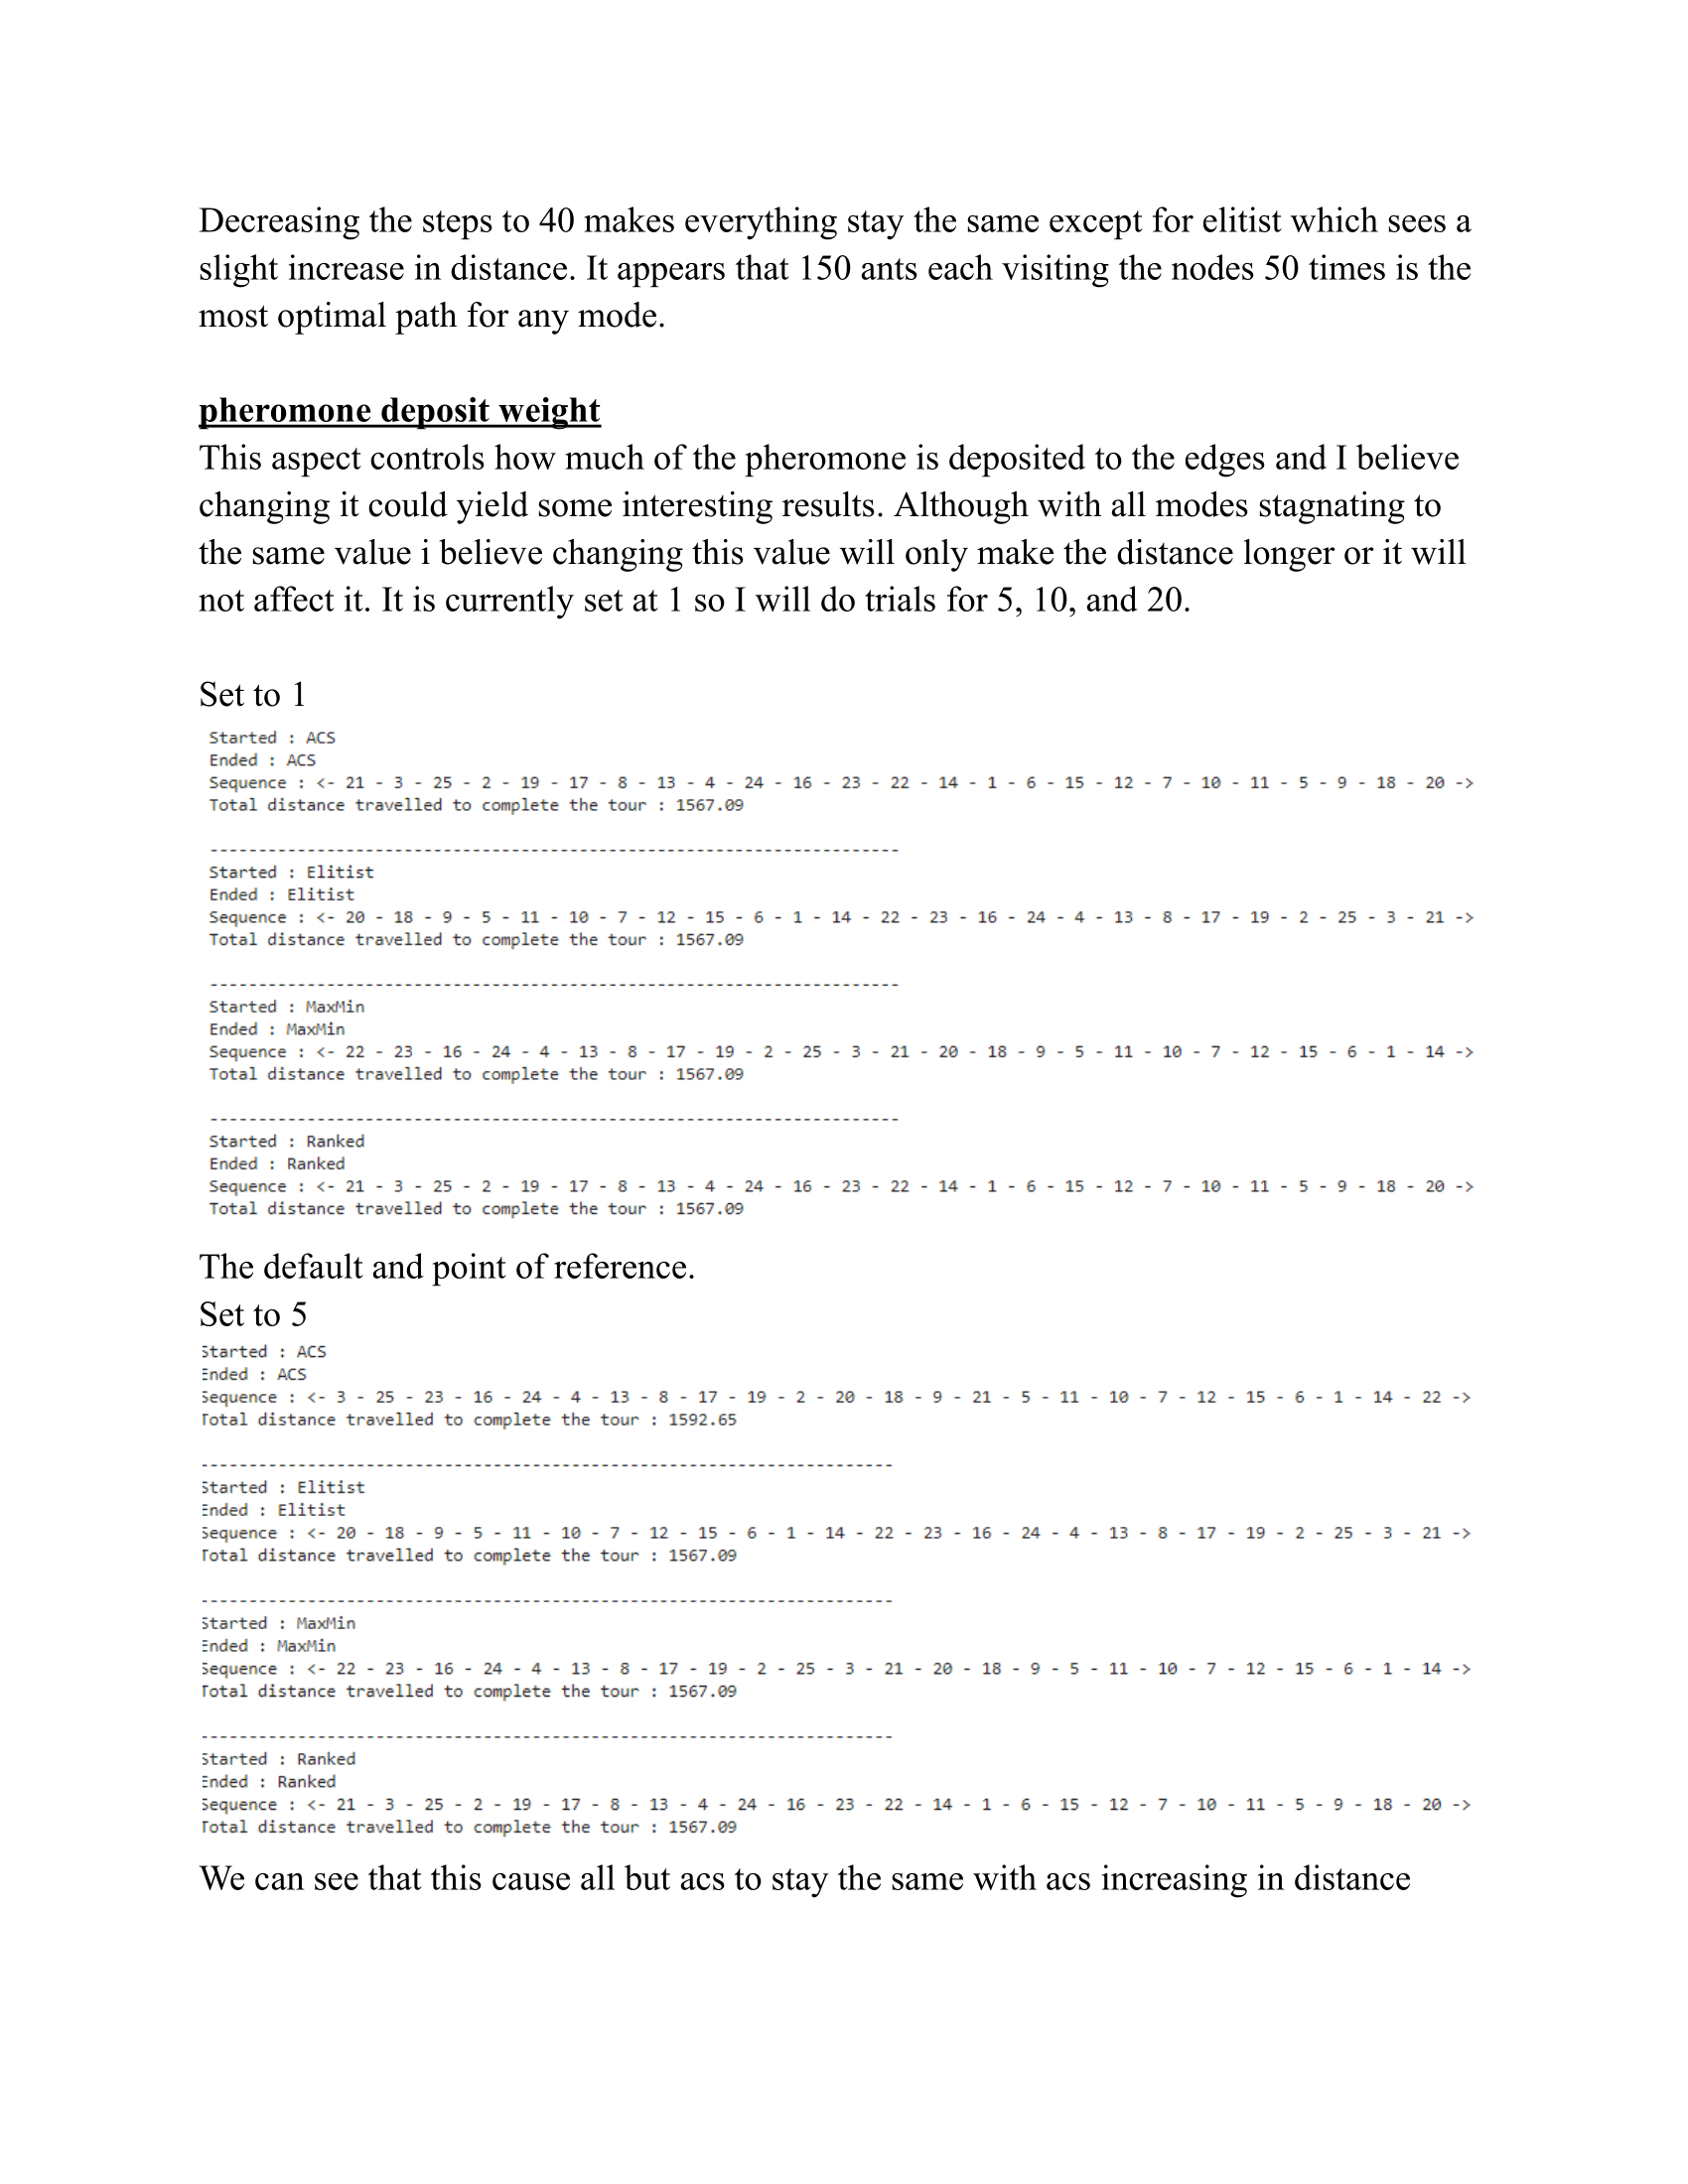

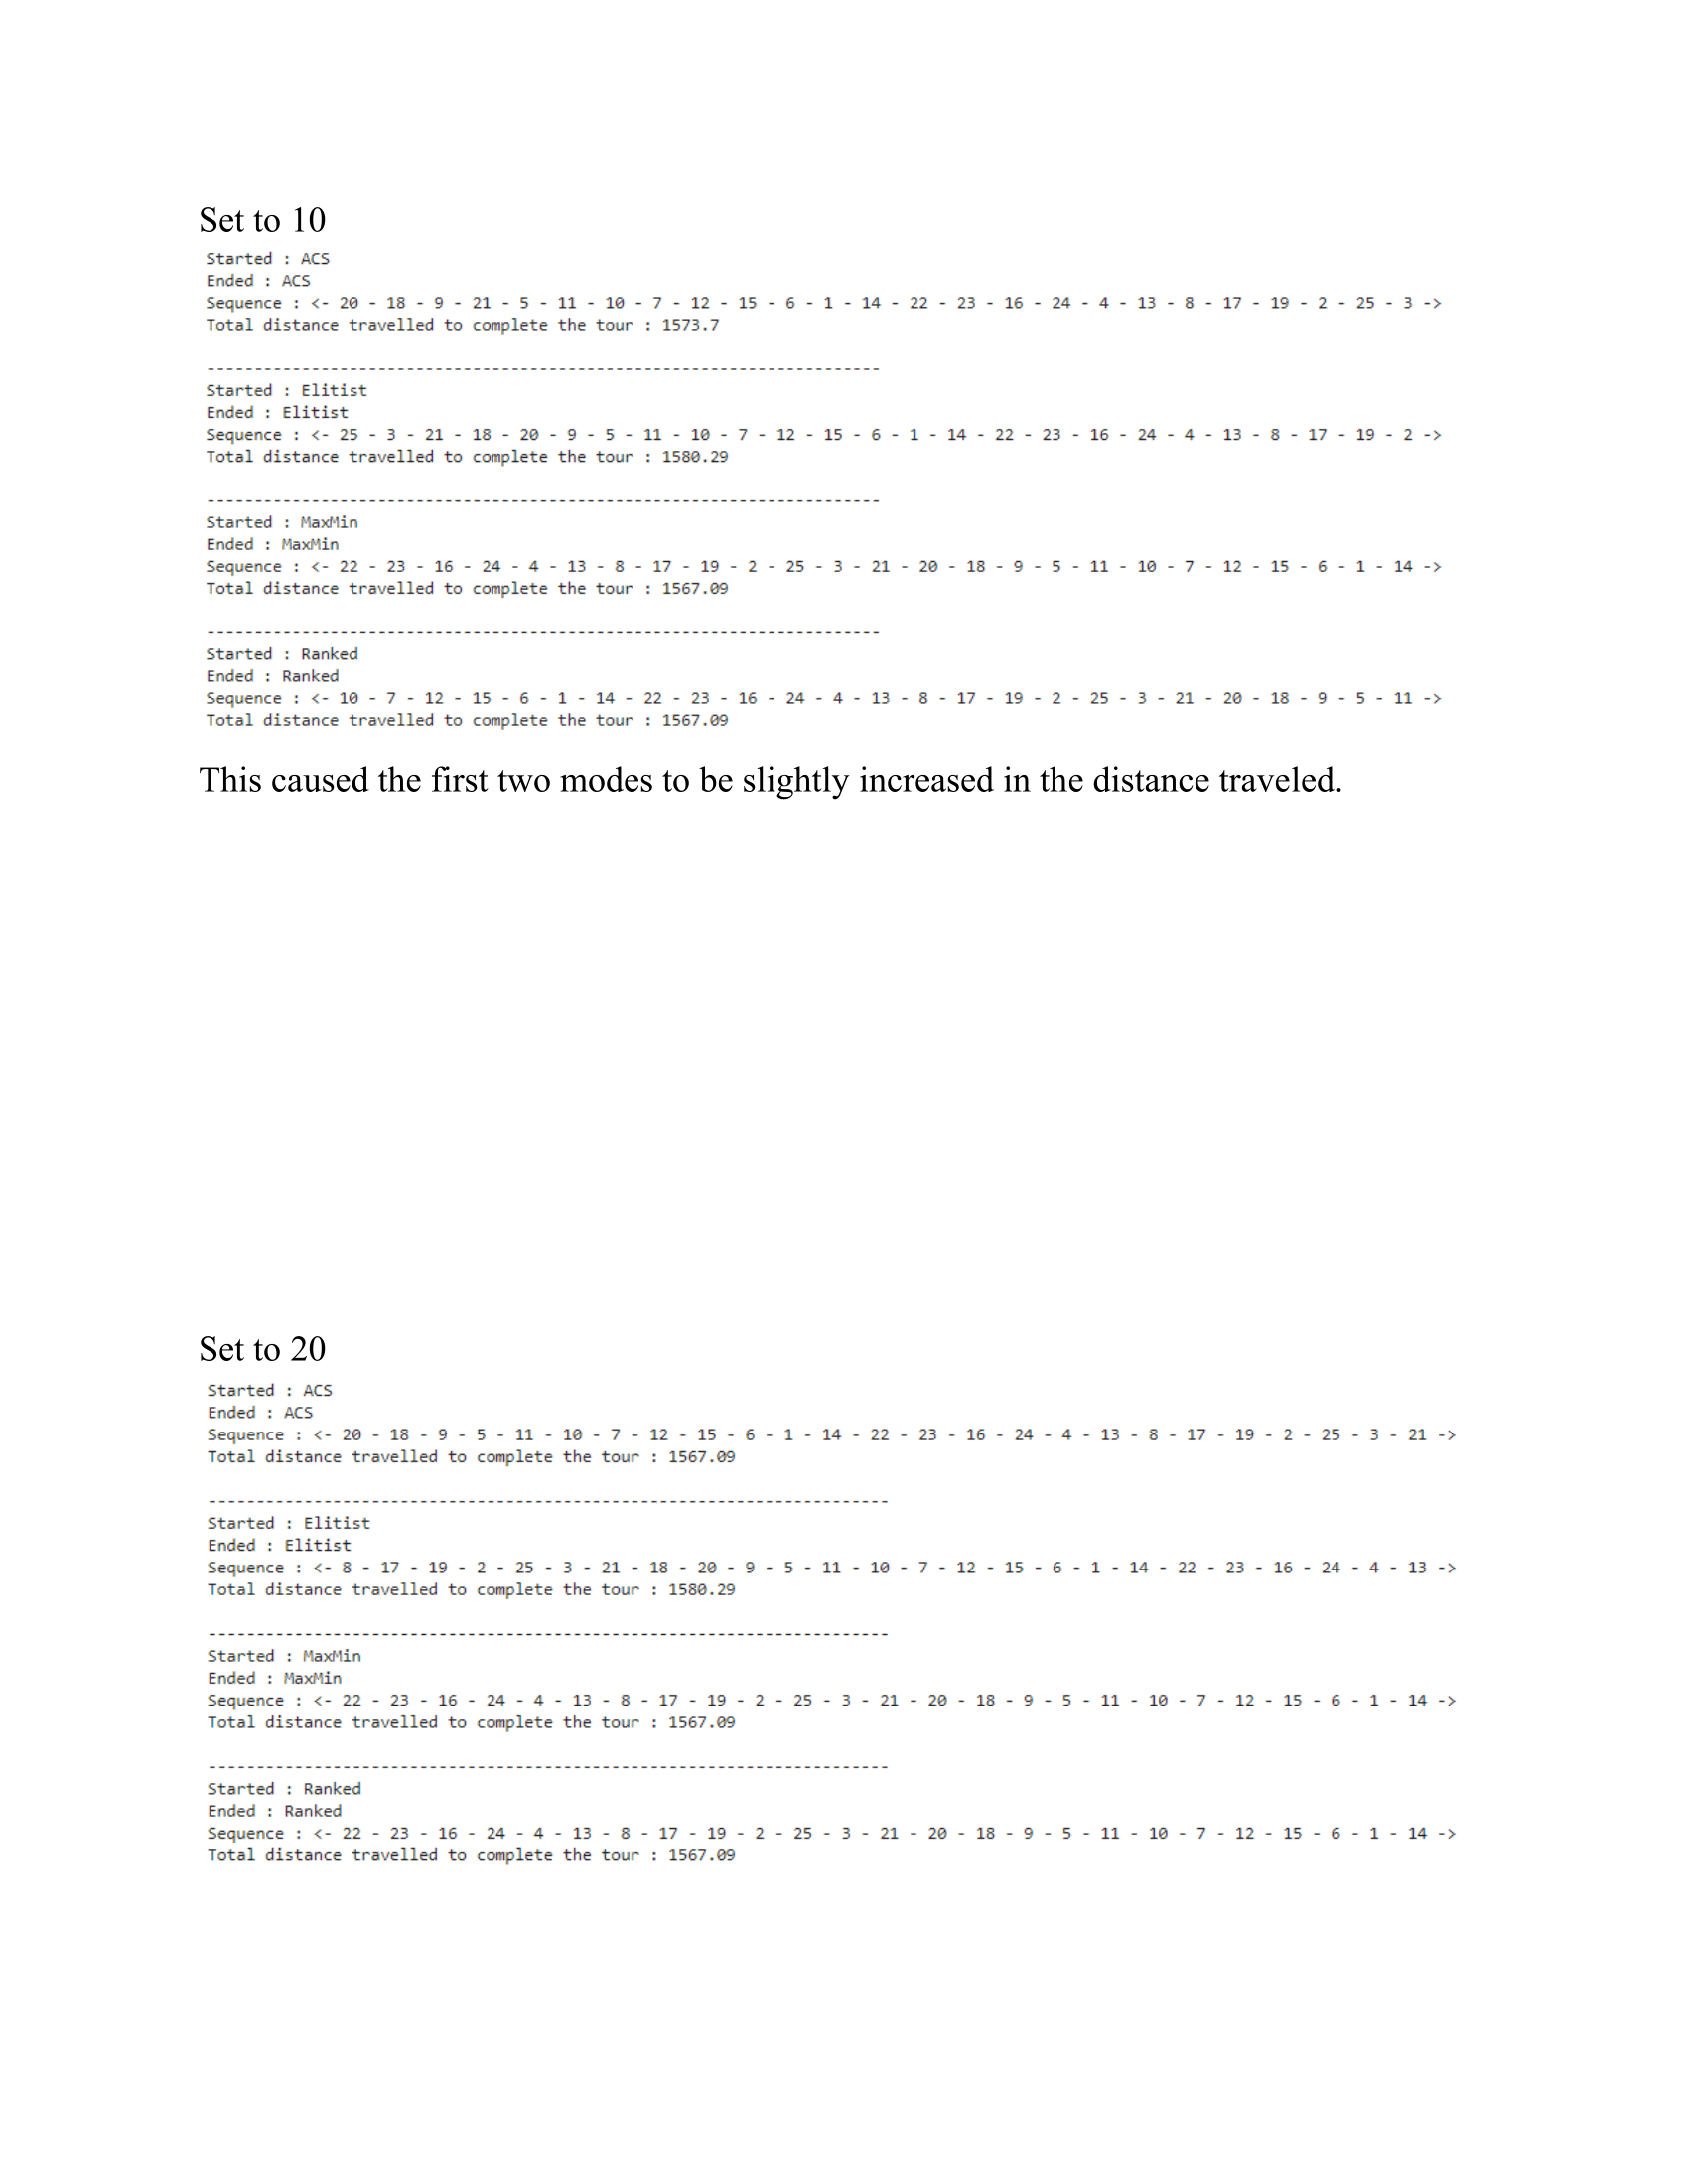

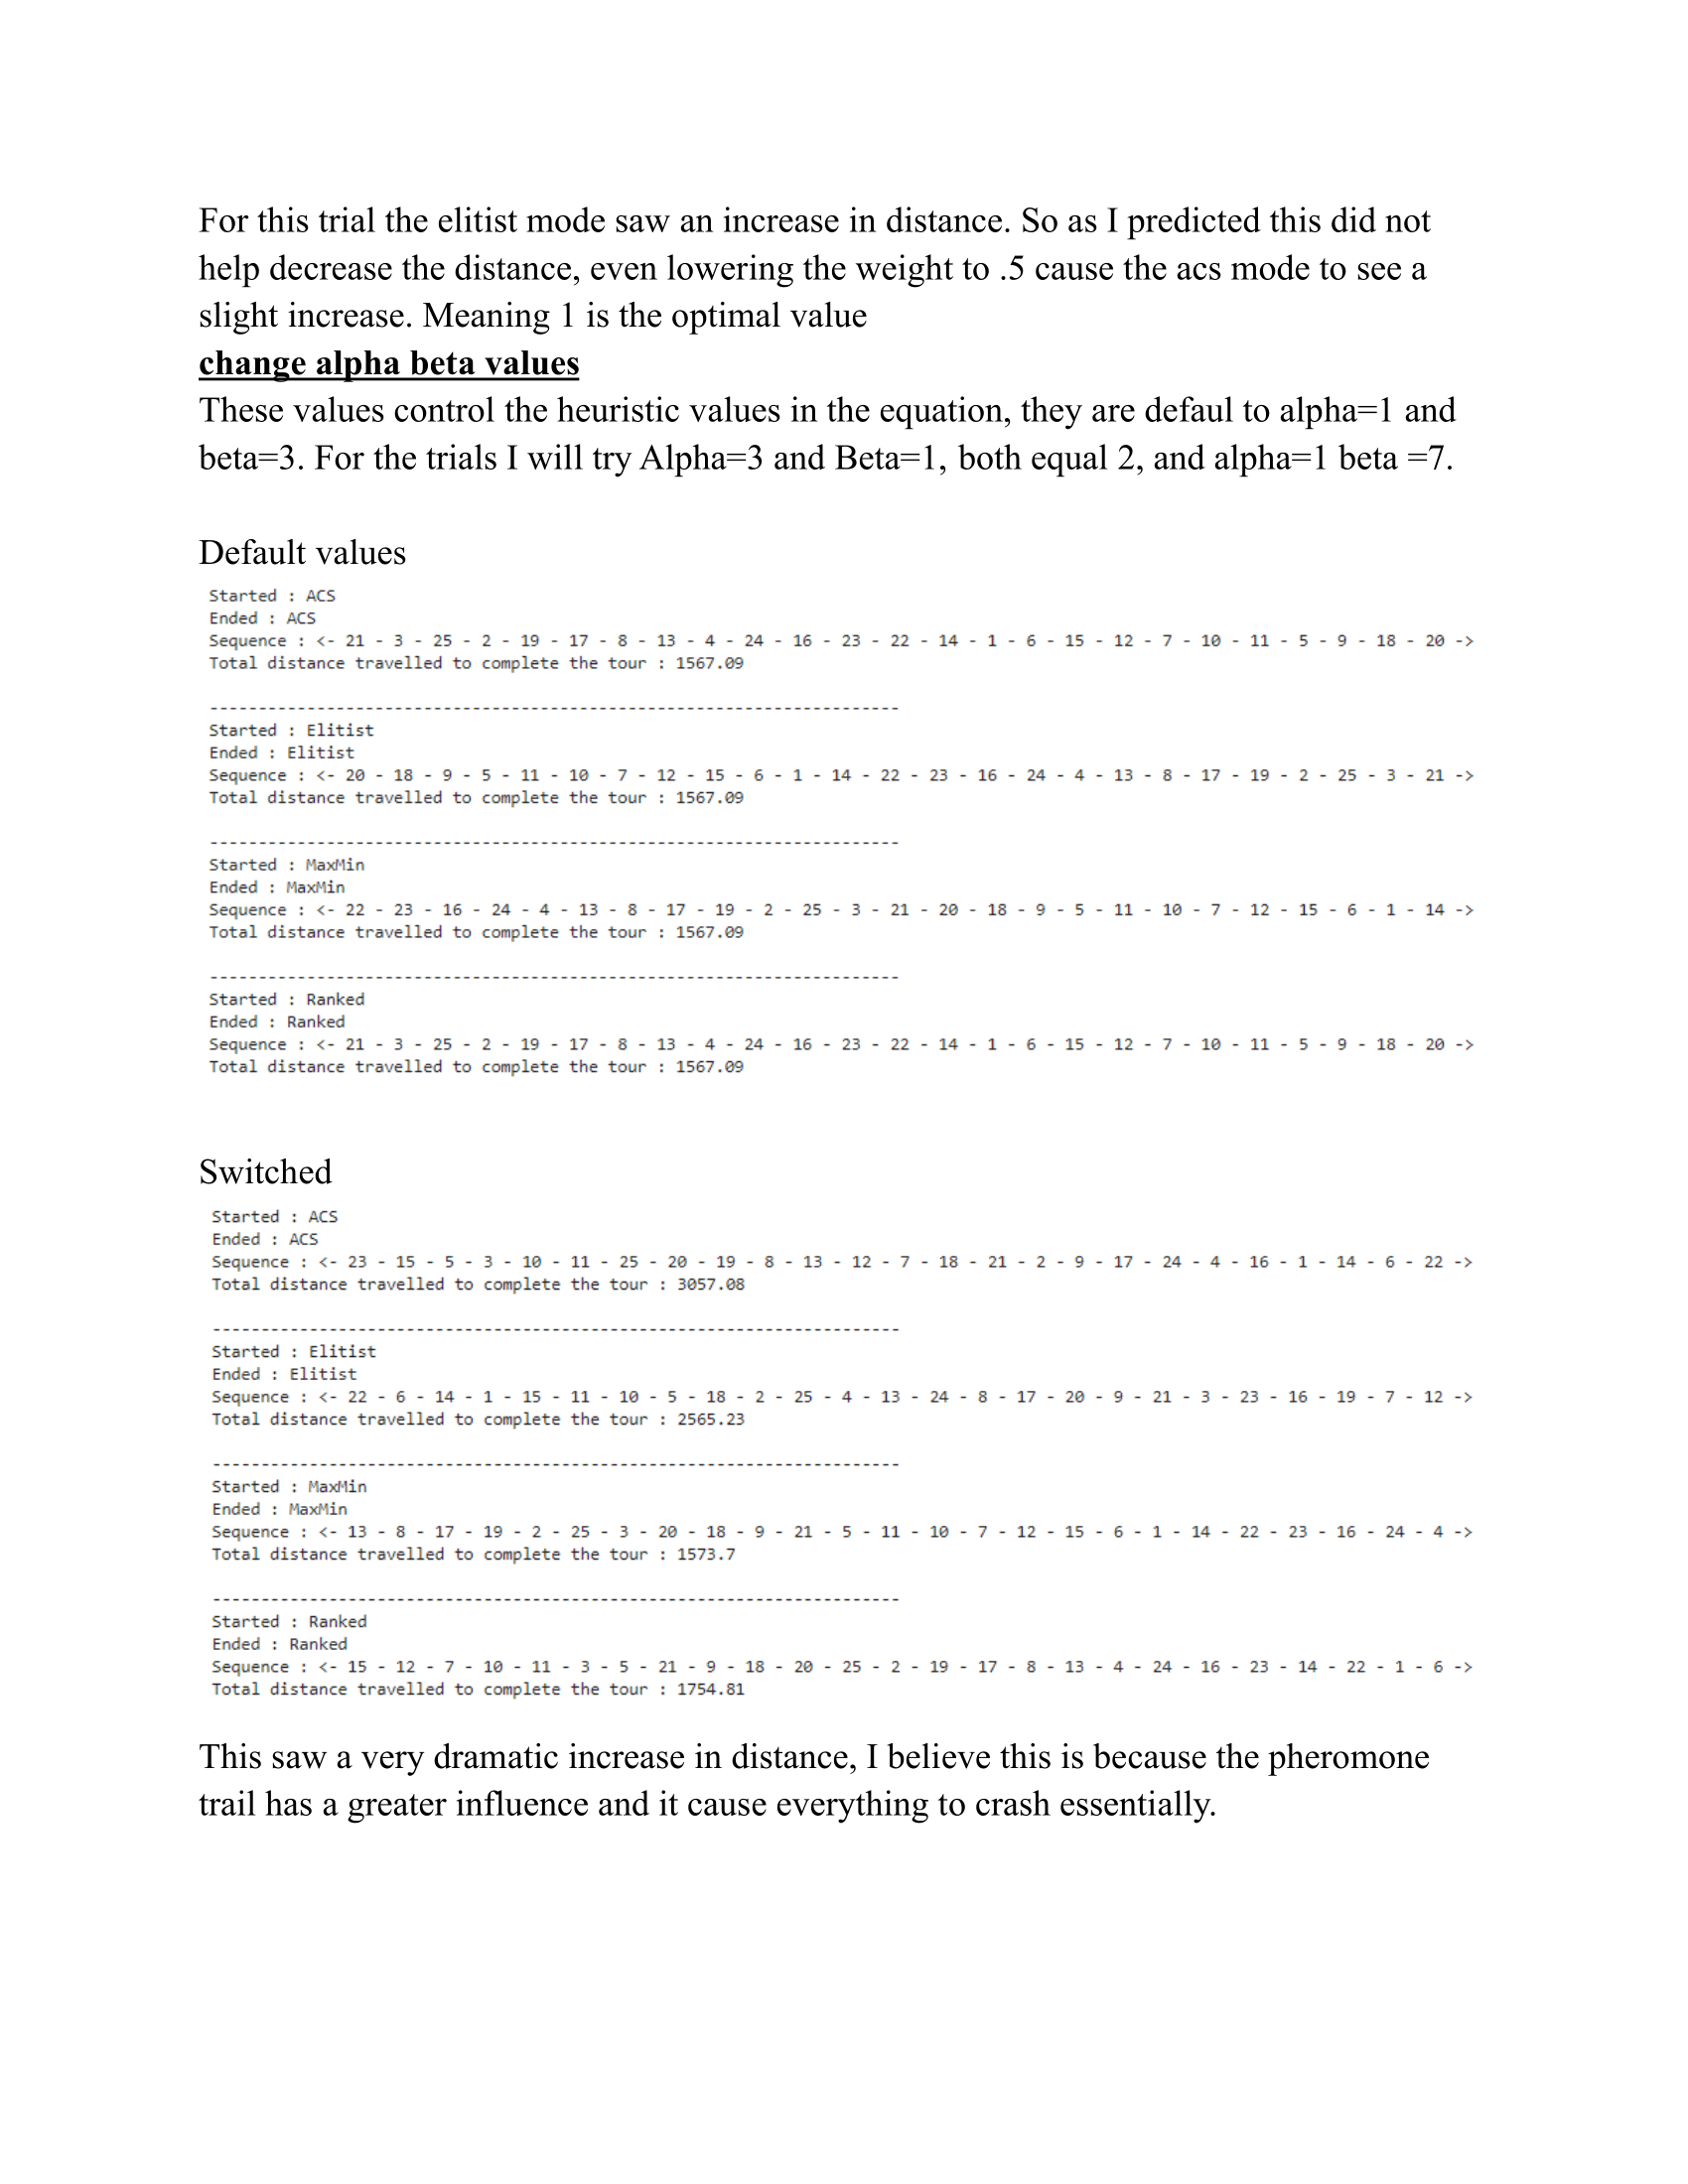

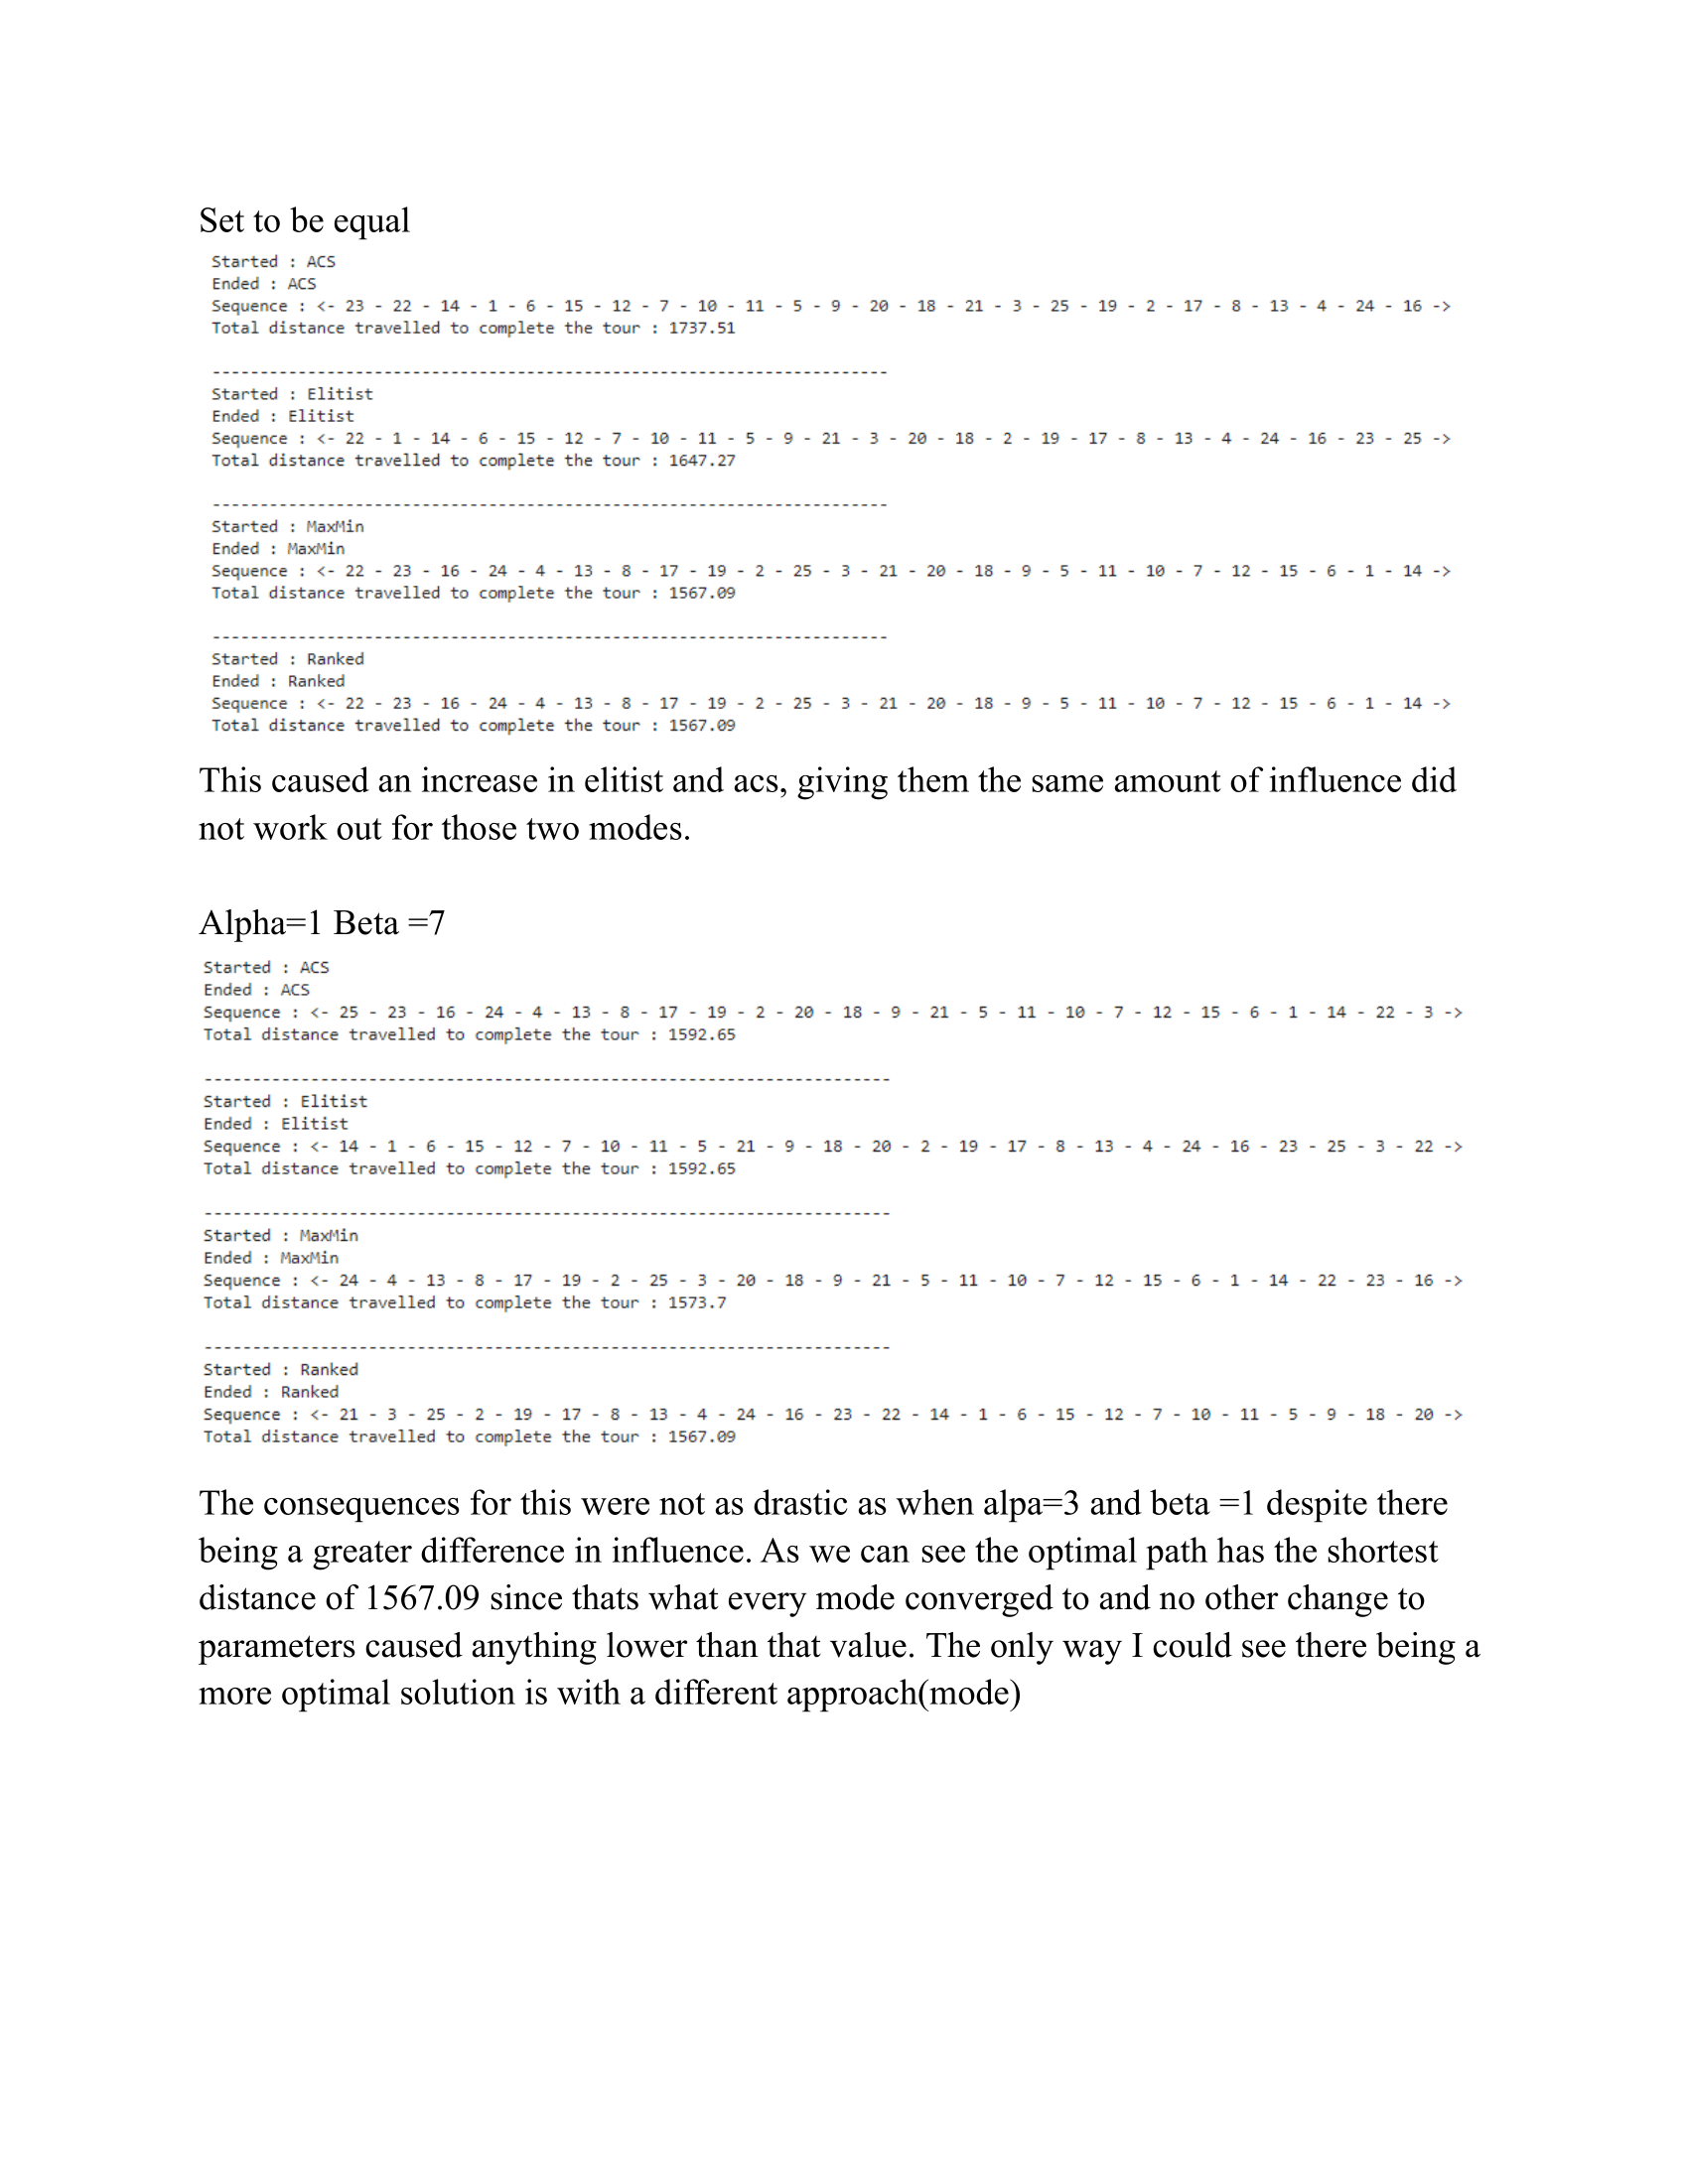

# Read Me

This assignment was created using code by Rochak Gupta whose git repo can be found below

https://github.com/rochakgupta/aco-tsp

All that is required to run is google colab